# Prediksi Harga Rumah Menggunakan Regresi Linier

memprediksi harga jual setiap rumah dengan rumus dasar dan library yang tersedia

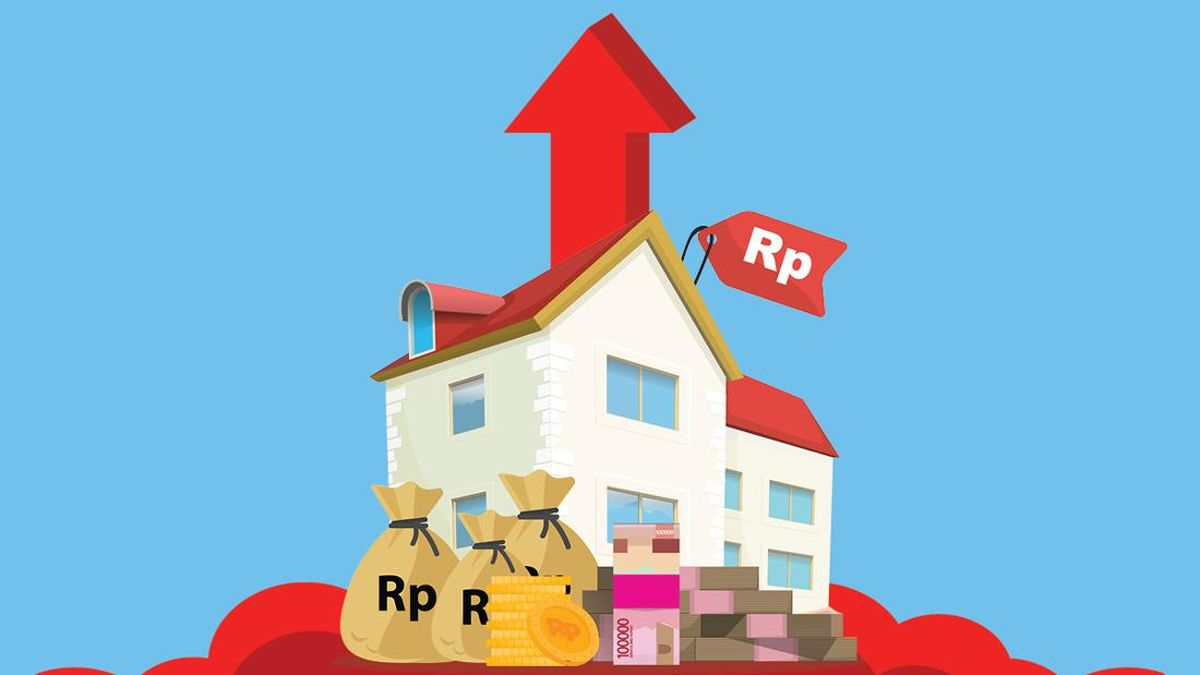

1.  Pembahasan Regresi
    Regresi -> Teknik untuk menentukan/mrngukur hubungan antara dua atau lebih variabel
    Contoh -> Pendapatan - Pengeluaran, Akademik - Kerja, Brat - Kalori, Waktu - Jarak

2.  Macam-macam dari regresi : 
    1. Simple Linear -> independent variable ada 1
    Contoh : Dependent : Waktu, Independent : Jarak
    2. Mutiple Linear ->  independent variable ada 2 atau lebih
    Contoh -> Dependent : Waktu, Independent : Jarak, Traffic Light

3.  Fungsi
    1. Prediction -> Memperkirakan nilai nilai apa saja dan kapan saja(Masa lalu, masa sekarang, dan masa depan)
    2. Forecasting -> Memperkirakan nilai nilai data time series di masa depan

4. Langkah Langkah
    - Tentukan tujuan
    - identifikasi variabel
    - Pengumpulan data
    - Hitung Rumus
    - Buat model Persamaan regresi Linear
    - Lakukan prediksi

Rumus Regresi Linear :

1. **Simple Linear**

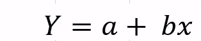



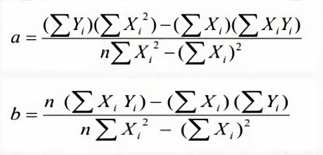

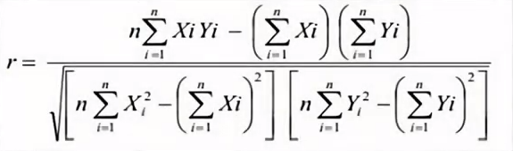

Keterangan untuk persamaan regresi linear:

- **Y:** Variabel respons atau terikat yang ingin diprediksi.
- **a:** Intercept adalah nilai Y ketika variabel penjelas (x) memiliki nilai 0. Dengan kata lain, ini adalah titik potong dengan sumbu Y saat x sama dengan 0. Secara praktis, intercept mewakili perkiraan nilai Y ketika semua variabel penjelas dianggap nol. Meskipun pada beberapa kasus nilai ini dapat memiliki interpretasi fisik, pada banyak konteks, nilai intercept perlu dilihat bersamaan dengan nilai koefisien regresi (b) untuk memberikan interpretasi yang lebih lengkap.
- **b:** Koefisien regresi (b) menunjukkan seberapa besar perubahan yang diharapkan dalam variabel respons (Y) ketika variabel penjelas (x) bertambah satu unit. Dengan kata lain,b mengukur kepekaan perubahan dalam Y terhadap perubahan satu unit dalam x. Jika b positif, maka perubahan dalam x cenderung dikaitkan dengan peningkatan dalam Y, sedangkan jika b negatif, perubahan dalam  x cenderung dikaitkan dengan penurunan dalam Y. Nilai b yang lebih besar menunjukkan pengaruh yang lebih besar dari x terhadap Y, dan sebaliknya.
- **x:** Variabel penjelas atau bebas, yang menjadi faktor penentu atau prediktor.
- **r:** Koefisien korelasi, mengukur kekuatan dan arah hubungan linier antara Y dan x. Nilai r berkisar dari -1 hingga 1, dengan 1 menunjukkan hubungan linier positif sempurna, -1 menunjukkan hubungan linier negatif sempurna, dan 0 menunjukkan tidak adanya hubungan linier.


2. **Multiple Linear**

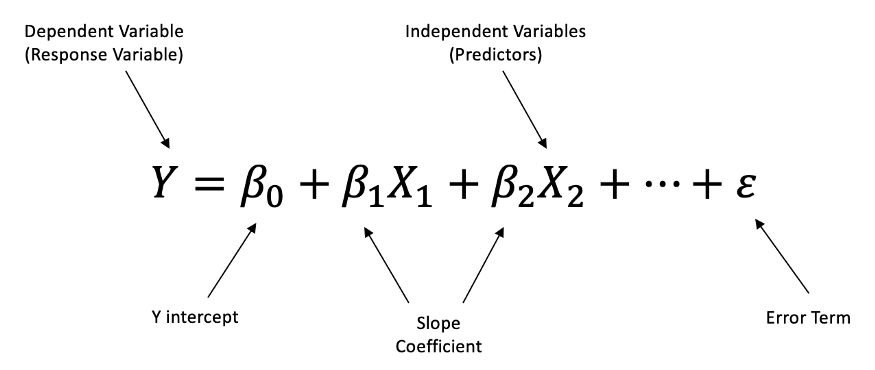

Dalam evaluasi model regresi:

1. **MAE (Mean Absolute Error):**
   - **Definisi:** Rata-rata kesalahan absolut antara nilai prediksi dan observasi aktual.
   - **Kelebihan:** Memberikan informasi tentang seberapa besar kesalahan rata-rata model.

2. **RMSE (Root Mean Squared Error):**
   - **Definisi:** Akar kuadrat dari rata-rata kesalahan kuadrat antara nilai prediksi dan observasi aktual.
   - **Kelebihan:** Memberikan bobot lebih besar pada kesalahan yang signifikan, berguna untuk menangani variabilitas data.

3. **R-squared (R2):**
   - **Definisi:** Mengukur sejauh mana variabilitas dalam variabel dependen dapat dijelaskan oleh model.
   - **Kelebihan:** Memberikan gambaran seberapa baik model sesuai dengan data dan menjelaskan variasi.

- R2 memberikan pandangan tentang kemampuan model secara keseluruhan, 
- sementara MAE dan RMSE memberikan gambaran kesalahan spesifik.

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Basic Libraries & Data</h1>

# Import Basic Libraries

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer


# Import Data & Overview

In [12]:
df_train = pd.read_csv('data_tubes/train.csv')
df_test = pd.read_csv('data_tubes/test.csv')

In [13]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df_train.describe().round(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,...,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.0
mean,730.50,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,...,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.2
std,421.61,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,...,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.5
min,1.00,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.0
25%,365.75,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.0
50%,730.50,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,...,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.0
75%,1095.25,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,...,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.0
max,1460.00,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,...,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.0


Kesimpulan:
* <span style="color:Red">Ada nilai-nilai yang hilang.</span>
* Ada kolom yang mungkin tidak kita perlukan.

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Exploratory Data Analysis</h1>

# Exploratory Data Analysis

In [16]:
# Periksa apakah semua variabel di kedua data (train, test) identik kecuali variabel respon ('Harga Jual')
(df_train.columns.drop('SalePrice') == df_test.columns).any()

True

In [17]:
# drop 'Id' columns from data train dataframe
df_train.drop(["Id"], axis=1, inplace=True)
# drop 'Id' column from test dataframe and save it in (id_test_list) to use it in prediction.
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [18]:
# Define Numeric and Categorical columns.
numerical_cols = []
categorical_cols = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols.append(df_train[col].name)
    else:
        categorical_cols.append(df_train[col].name)

In [19]:
# save numerical and categorigal data in independent dataframes for train and test data.

numerical_df_train = df_train[numerical_cols]
categorical_df_train = df_train[categorical_cols]

numerical_df_test = df_test[numerical_cols[0:-1]]
categorical_df_test = df_test[categorical_cols]

In [20]:
numerical_df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [21]:
categorical_df_test.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# EDA with numerical data

## 1. Investigate the distributions.

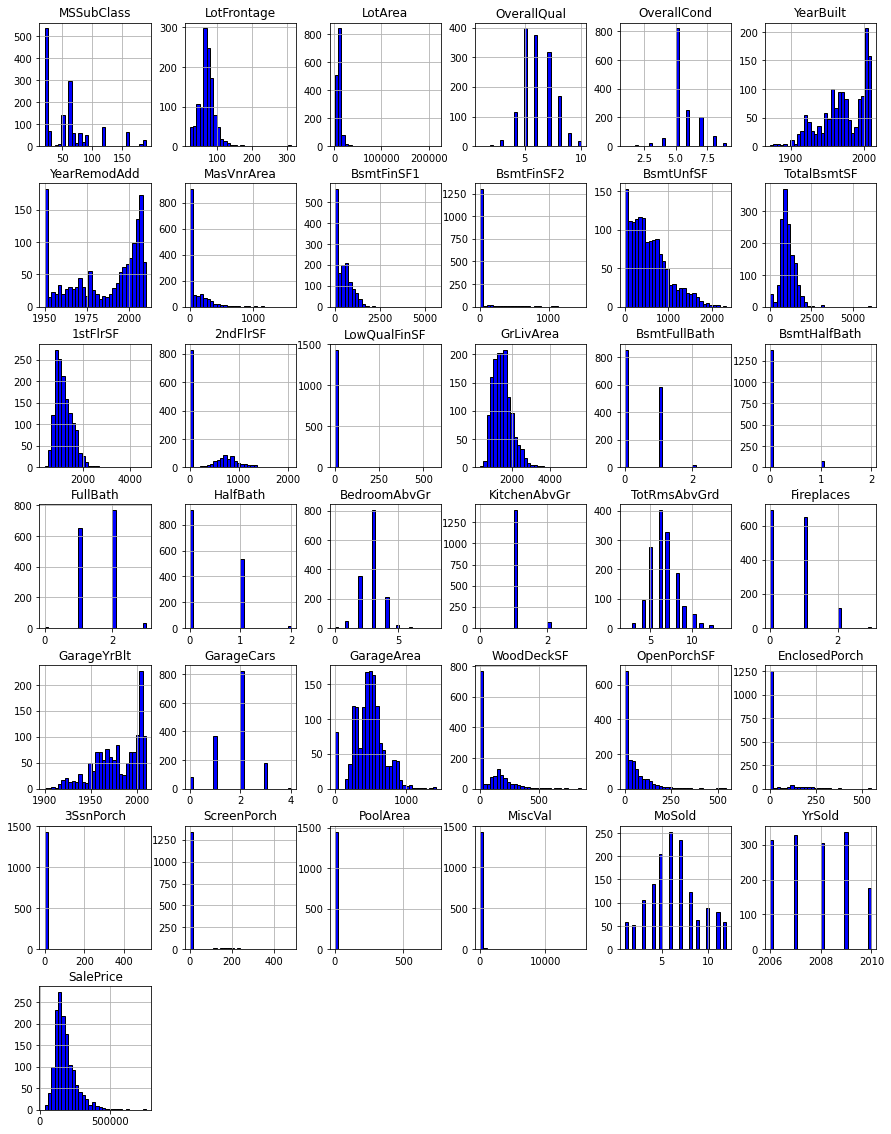

In [22]:
numerical_df_train.hist(figsize=(15,20), bins=30, color='blue', edgecolor='black');

In [23]:
# Kita melihat ada beberapa kolom yang memusatkan sebagian besar nilainya pada satu nilai
# hapus kolom dengan varians rendah (karena kolom tersebut tidak memberikan kontribusi yang berarti terhadap kemampuan prediktif model)

from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=0.15)   # column where 85% of the values are constant
data_high_variance = thresholder.fit(numerical_df_train)

In [24]:
# drop kolom yang 85% nilainya konstan

high_variance_list = []
for col in numerical_df_train.columns:
    if col not in numerical_df_train.columns[thresholder.get_support()]:
        high_variance_list.append(col)

high_variance_list

['BsmtHalfBath', 'KitchenAbvGr']

In [25]:
df_train.drop(high_variance_list, axis=1, inplace=True)
df_test.drop(high_variance_list, axis=1, inplace=True)

## 2. Investigate the correlations.

<AxesSubplot:>

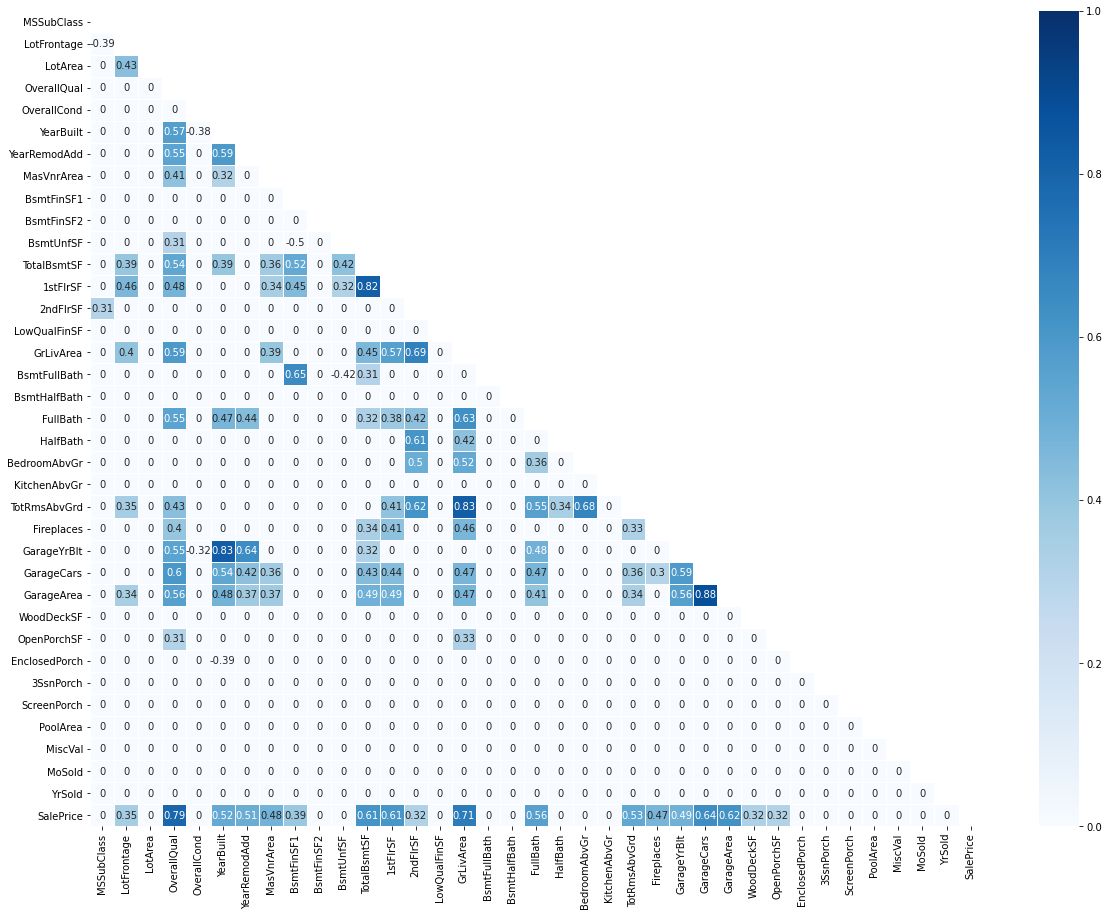

In [26]:
# plot correlation heatmap
plt.figure(figsize = (20,15))

corr_matrix = numerical_df_train.corr()
mask =  np.triu(np.ones_like(corr_matrix, dtype=bool))
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0
sns.heatmap(corr_matrix, annot=True, mask=mask, linewidths=0.5,cmap='Blues', vmin=0, vmax=1)

In [27]:
# variabel yang memiliki korelasi rendah dengan 'Harga Jual' [kurang dari 0,25 atau -0,25]
condition  = numerical_df_train.corr()['SalePrice'] < 0.25
condition2 = numerical_df_train.corr()['SalePrice'] > -0.25
low_corr_cols = (numerical_df_train.corr()[condition & condition2]['SalePrice'].index).to_list()
low_corr_cols

['MSSubClass',
 'OverallCond',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [28]:
# variables that have a high correlation with 'SalePrice'.
high_corr_cols = [elem for elem in (numerical_df_train.columns).to_list() if elem not in low_corr_cols]
high_corr_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [29]:
# hapus variabel yang memiliki korelasi rendah dengan 'Harga Jual'.
for i in range(len(low_corr_cols)):
    if i in df_train.columns:
        df_train.drop(low_corr_cols, axis=1, inplace=True)
        df_test.drop(low_corr_cols, axis=1, inplace=True)


Menghapus variabel dengan korelasi rendah pada saat modeling linear regression bertujuan untuk meningkatkan interpretabilitas, mencegah multikolinearitas, dan mengurangi risiko overfitting. Variabel yang tidak memberikan kontribusi signifikan terhadap menjelaskan variabilitas dalam variabel target dapat dihilangkan untuk menyederhanakan model, memperbaiki efisiensi komputasional, dan meningkatkan kemampuan model dalam menggeneralisasi pada data baru.

C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\axisgrid.py:1559: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


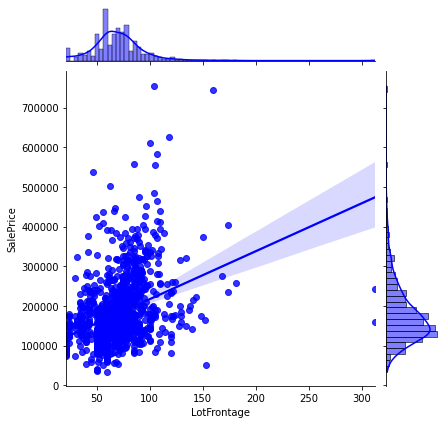

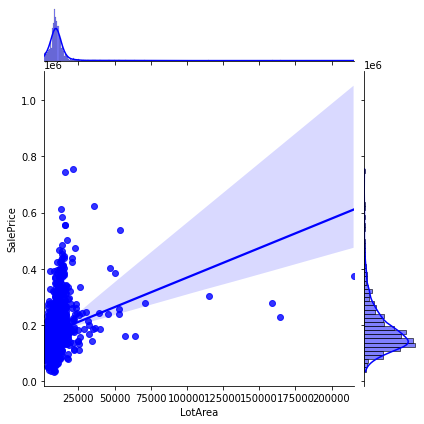

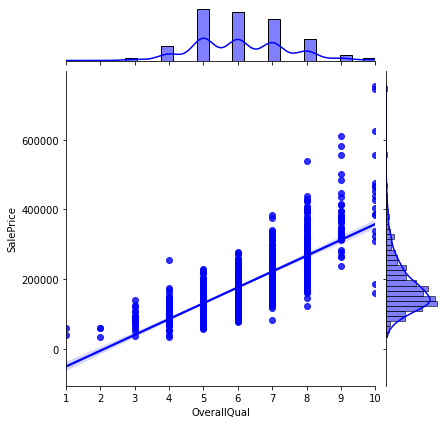

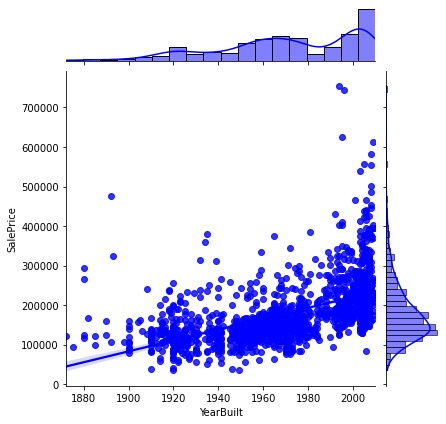

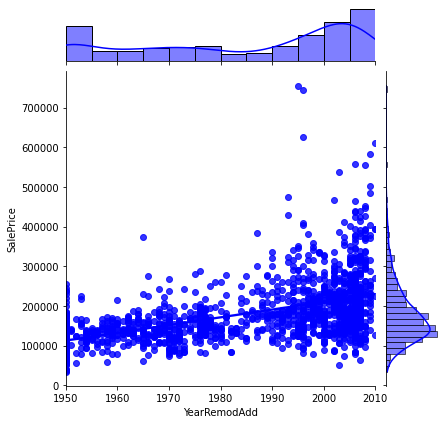

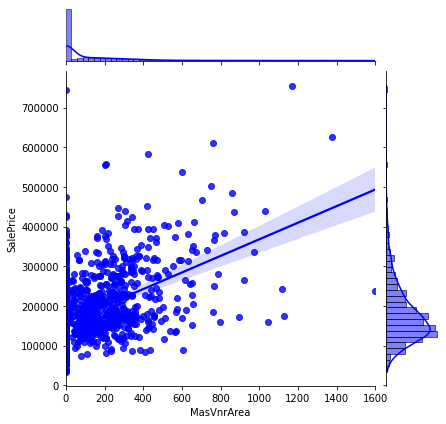

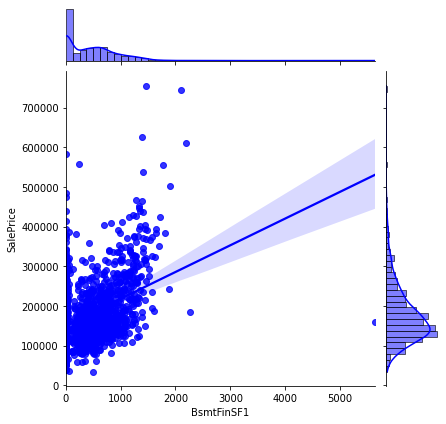

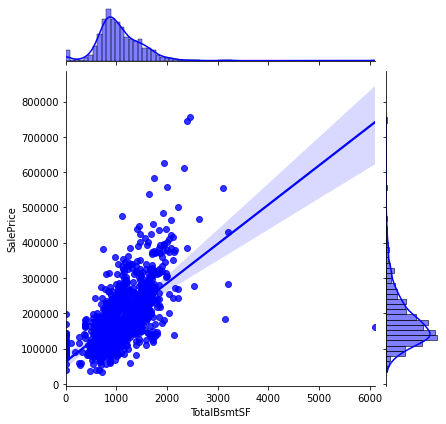

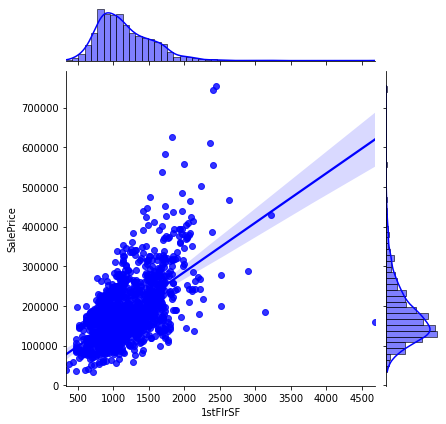

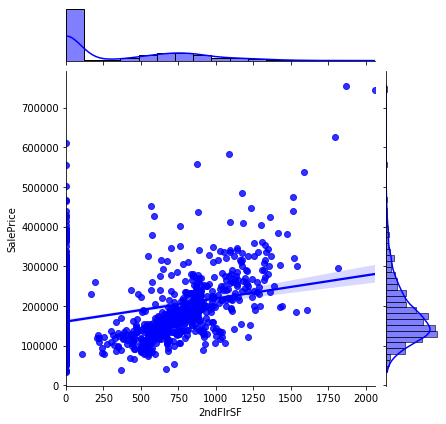

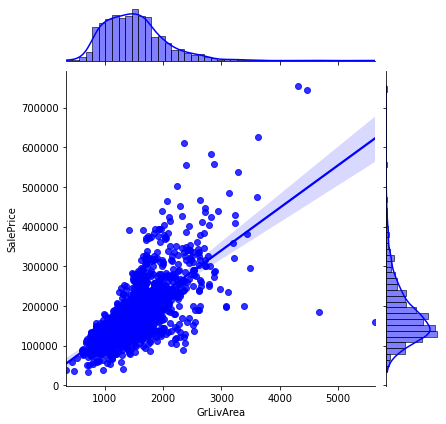

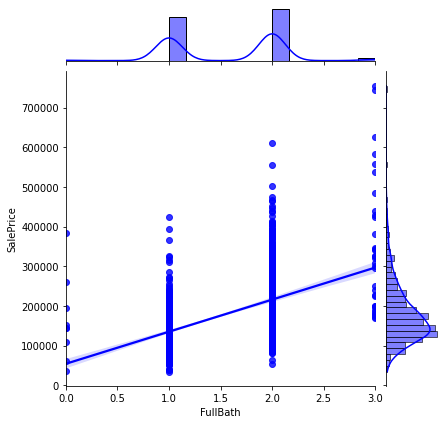

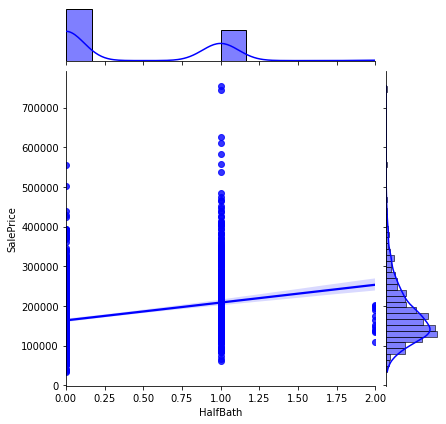

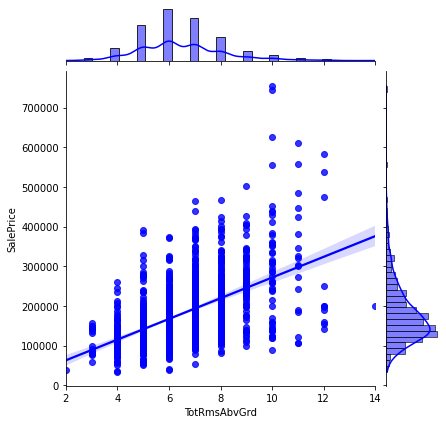

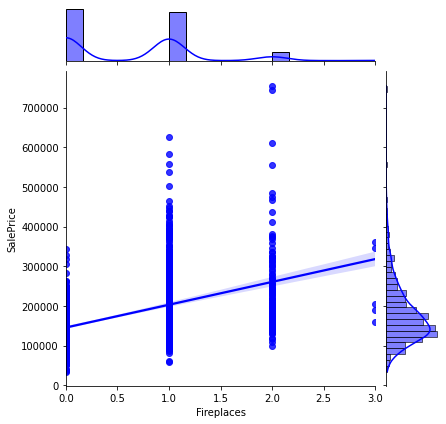

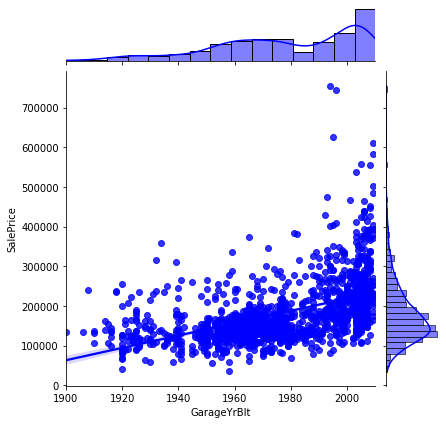

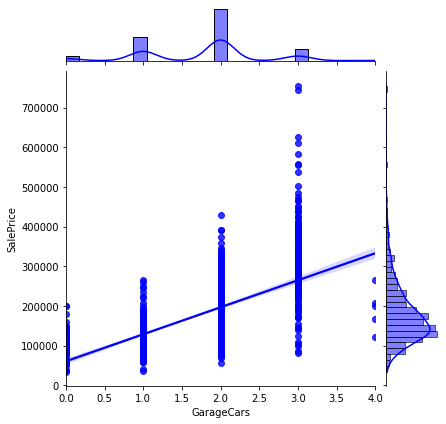

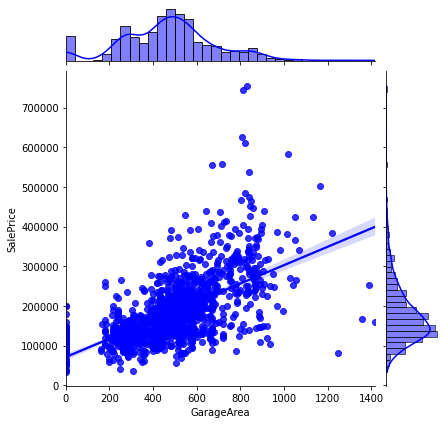

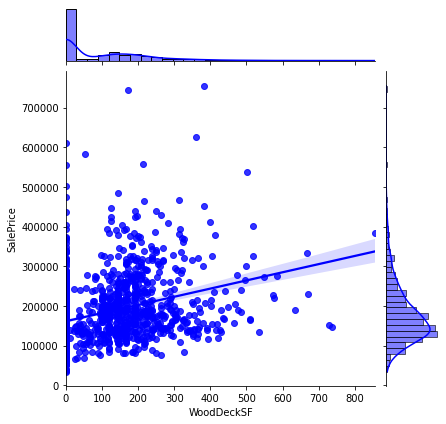

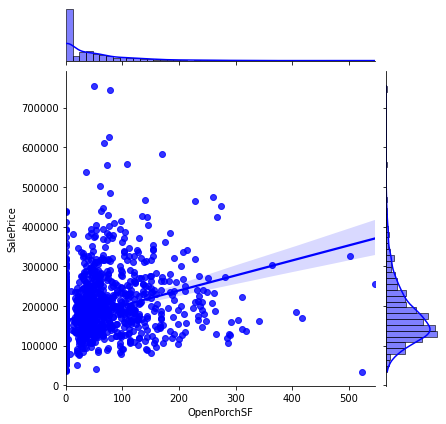

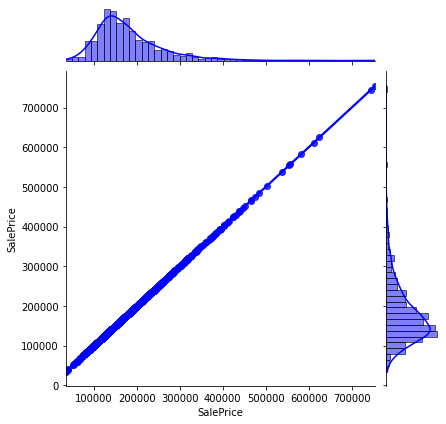

In [30]:
# plot the correlation of each feature with SalePrice (only high correlation feature)
for col in high_corr_cols:
    sns.jointplot(x=numerical_df_train.loc[:,col],y=numerical_df_train.loc[:,'SalePrice'], kind='reg', color='blue');

kesimpulan:
* <span style="color:Red">Ada outlier yang harus ditangani, karena dapat menyebabkan kesimpulan yang menyesatkan (Hal ini ditunjukkan pada diagram sebar).</span>
* Ada beberapa fitur yang memiliki korelasi kuat dengan variabel respon (Sale Price) dan ada pula yang memiliki korelasi lemah.

# EDA with categorical data

In [31]:
# create categorical dataframe and add 'SalePrice' column.
categorical_cols.append('SalePrice')
categorical_df_train = df_train[categorical_cols]
categorical_df_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

## 1. Investigate the distributions.

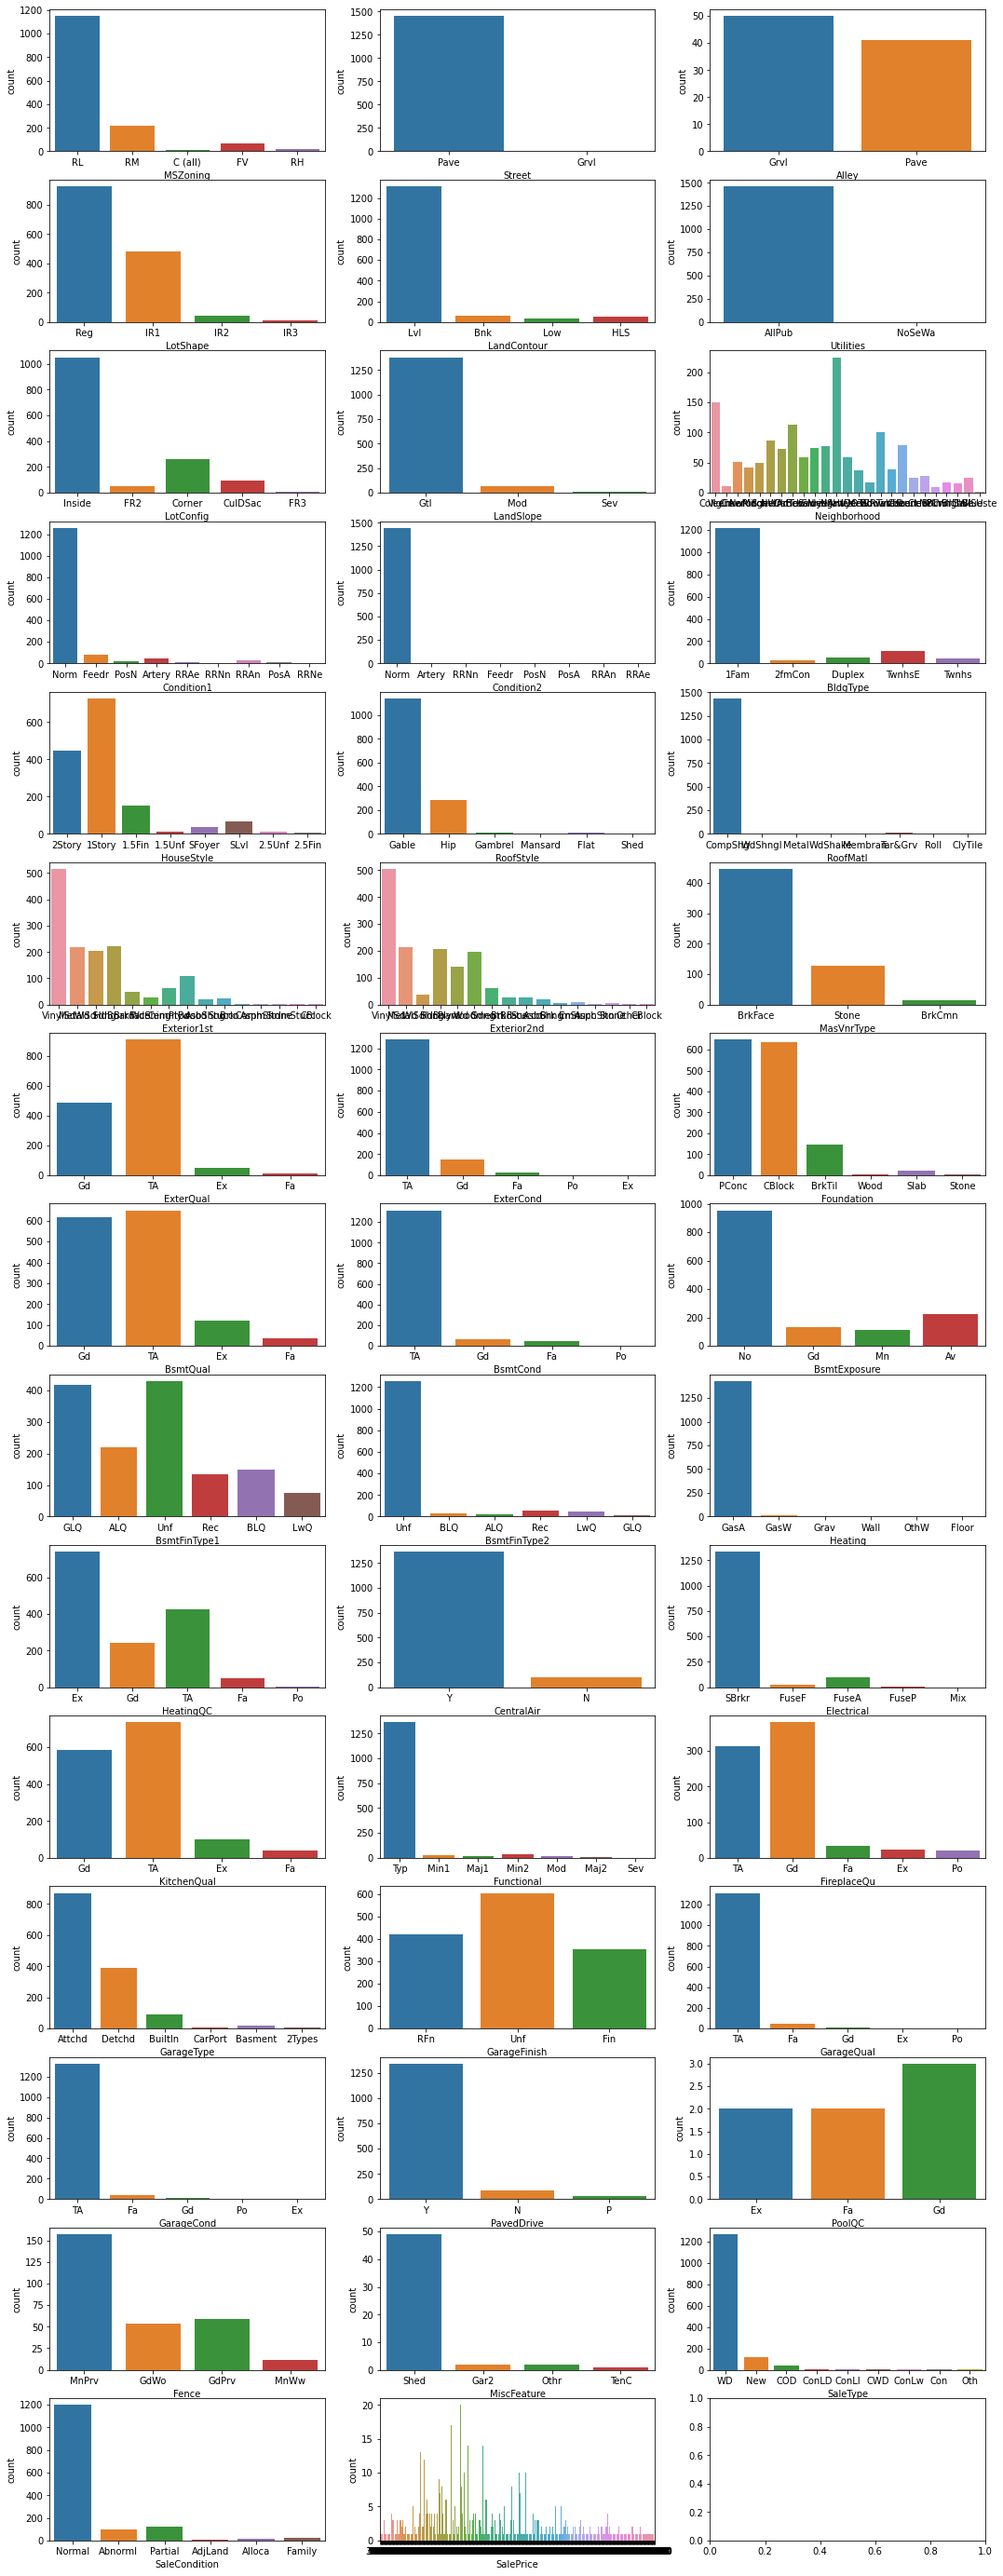

In [32]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in categorical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.countplot(x=categorical_df_train[col], data=categorical_df_train, ax=axes[i,j])
    else:
        sns.countplot(x=categorical_df_train[col], data=categorical_df_train, ax=axes[i,j])
    j += 1

In [33]:
# variabel sangat didominasi oleh satu fitur (lebih dari 90%).

high_dominated_features = []
for col in categorical_df_train.columns:
    if (categorical_df_train[col].value_counts().max()/categorical_df_train[col].count()) > 0.9:
        high_dominated_features.append(col)
        
high_dominated_features

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature']


Jika sebuah variabel dalam modeling linear regression sangat didominasi oleh satu fitur (lebih dari 90%), dapat menyebabkan model kurang variatif dan kurang informatif, menghasilkan perkiraan parameter yang tidak stabil dan rentan terhadap perubahan kecil. Variabel semacam itu juga dapat menyebabkan masalah multikolinearitas dan ketidakstabilan model, mempengaruhi kinerja prediksi terutama pada data baru.

In [34]:
df_train.drop(high_dominated_features, axis=1, inplace=True)
df_test.drop(high_dominated_features, axis=1, inplace=True)

## 2. Describe 'SalePrice' with each categorical feature.

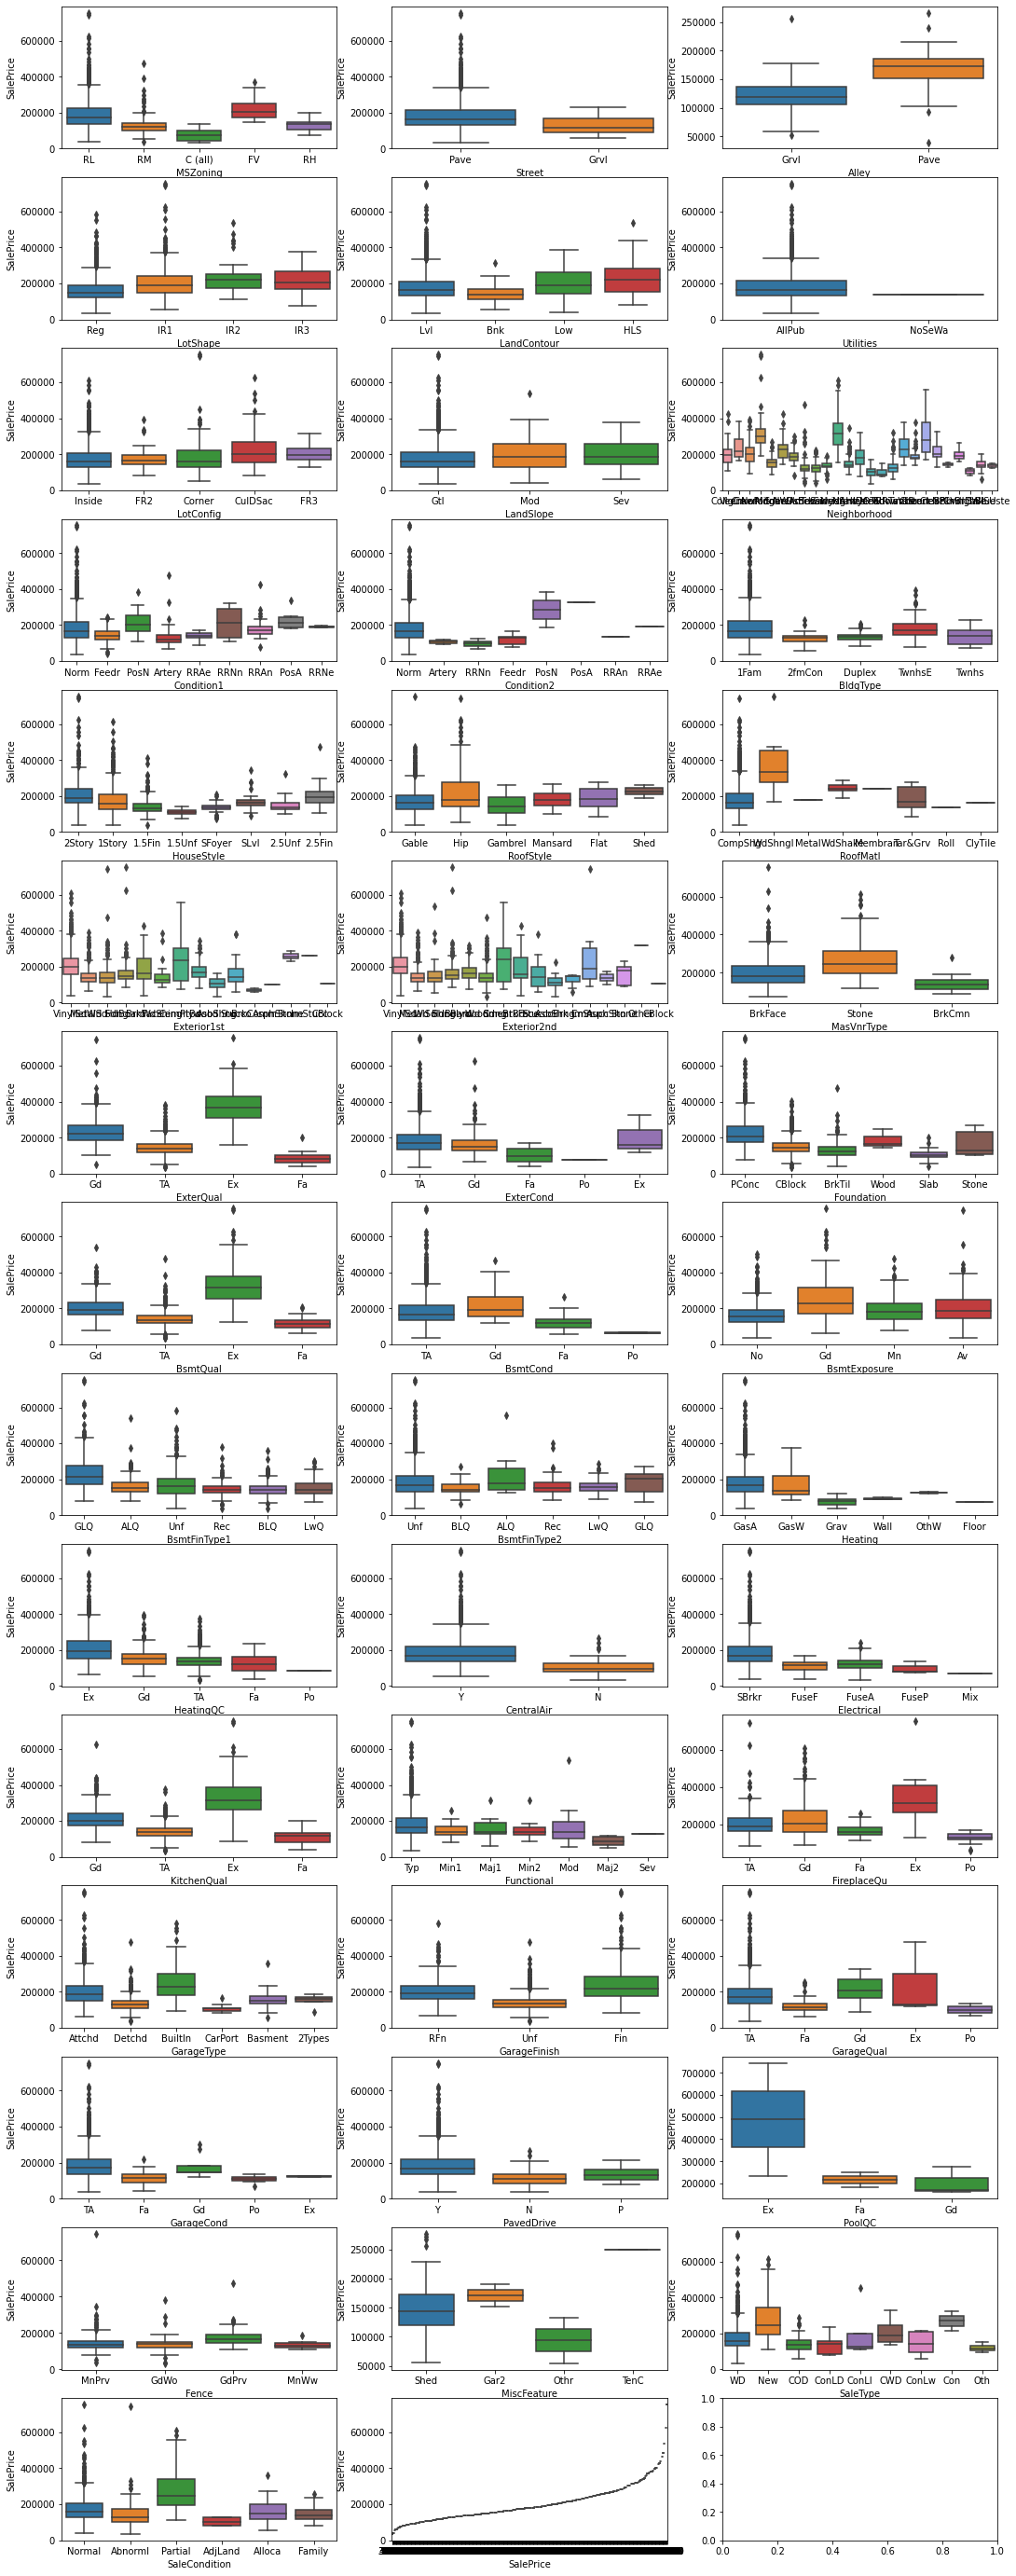

In [35]:
fig, axes = plt.subplots(15, 3, figsize=(18, 50))
i = 0
j = 0
for col in categorical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=col, y="SalePrice", data=categorical_df_train, ax=axes[i,j])
    else:
        sns.boxplot(x=col, y="SalePrice", data=categorical_df_train, ax=axes[i,j])
    j += 1

In [36]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [37]:
df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Data Preprocessing</h1>

# Data Cleaning

## 1. deleting duplicate values

In [38]:
print('number of duplicate values in numerical_df_train dataframe: ',numerical_df_train.duplicated().sum())
print('number of duplicate values in numerical_df_test dataframe: ',numerical_df_test.duplicated().sum())
print('number of duplicate values in categorical_df_train dataframe: ',categorical_df_train.duplicated().sum())
print('number of duplicate values in numerical_df_test dataframe: ',categorical_df_test.duplicated().sum())

number of duplicate values in numerical_df_train dataframe:  0
number of duplicate values in numerical_df_test dataframe:  0
number of duplicate values in categorical_df_train dataframe:  1
number of duplicate values in numerical_df_test dataframe:  14


In [39]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [40]:
# confirm changes
print('number of duplicate values in df_train dataframe: ',df_train.duplicated().sum())
print('number of duplicate values in df_test dataframe: ',df_test.duplicated().sum())

number of duplicate values in df_train dataframe:  0
number of duplicate values in df_test dataframe:  0


## 2. Missing values

<AxesSubplot:>

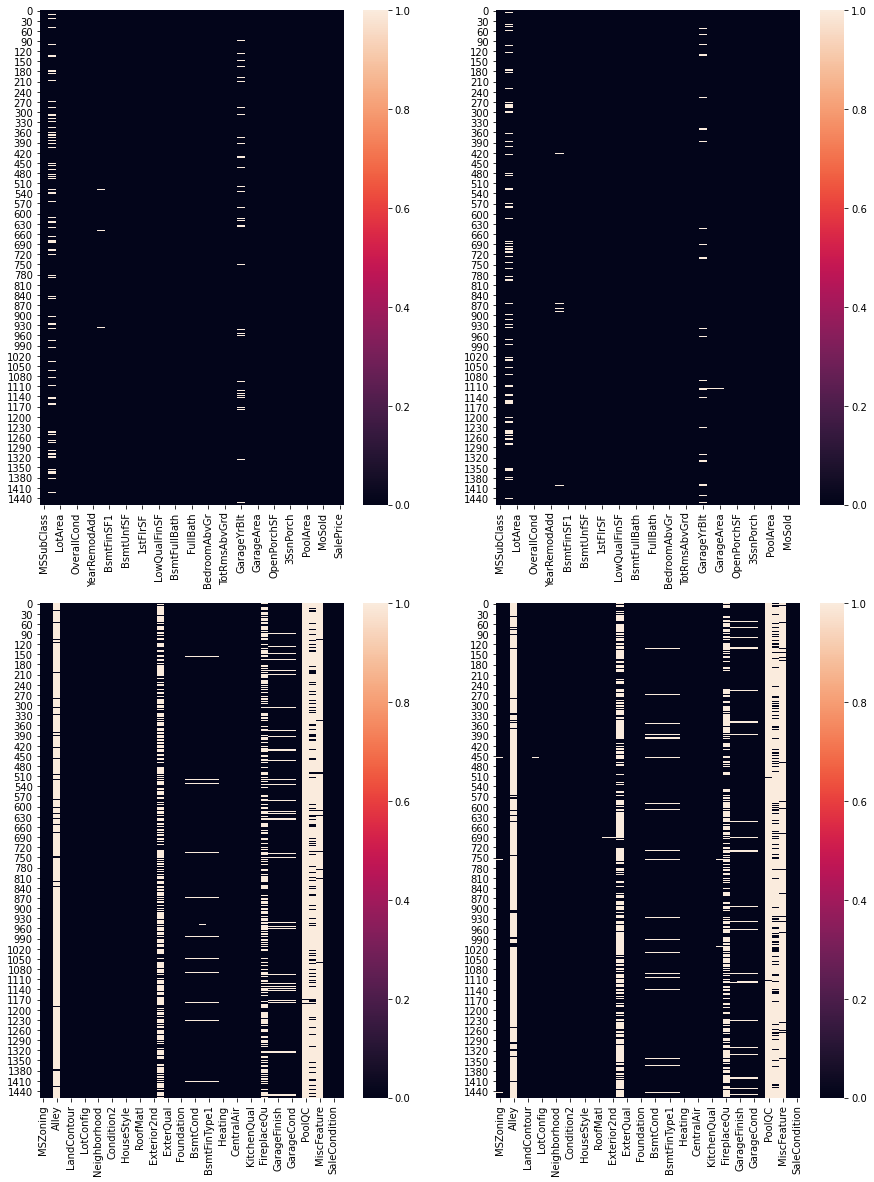

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15,20))
sns.heatmap(numerical_df_train.isnull(), ax=axes[0,0])
sns.heatmap(numerical_df_test.isnull(), ax=axes[0,1])
sns.heatmap(categorical_df_train.isnull(), ax=axes[1,0])
sns.heatmap(categorical_df_test.isnull(), ax=axes[1,1])

In [42]:
# hapus kolom yang hilang lebih dari 30%
def drop_missing(df):
    i = 0
    for col in df:
        if (df[col].isnull().sum()/1460) > 0.3:
            df.drop(col, axis=1, inplace=True)
            print('column',col,'is dropped')
            i += 1
    if i == 0:
        print('no column dropped')

In [43]:
drop_missing(df_train)

column Alley is dropped
column MasVnrType is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped


In [44]:
drop_missing(df_test)

column Alley is dropped
column MasVnrType is dropped
column FireplaceQu is dropped
column PoolQC is dropped
column Fence is dropped


In [45]:
def fill_null(df):
    for col in df:
        if (col in numerical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].median(), inplace = True)
            print('fillna numerical column: ',col)
        if (col in categorical_cols) & (df[col].isnull().any()):
            df[col].fillna(df[col].mode().iloc[0], inplace = True)
            print('fillna categorical column: ',col)

In [46]:
fill_null(df_train)

fillna numerical column:  LotFrontage
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna categorical column:  BsmtFinType2
fillna categorical column:  GarageType
fillna numerical column:  GarageYrBlt
fillna categorical column:  GarageFinish


In [47]:
fill_null(df_test)

fillna categorical column:  MSZoning
fillna numerical column:  LotFrontage
fillna categorical column:  Exterior1st
fillna categorical column:  Exterior2nd
fillna numerical column:  MasVnrArea
fillna categorical column:  BsmtQual
fillna categorical column:  BsmtExposure
fillna categorical column:  BsmtFinType1
fillna numerical column:  BsmtFinSF1
fillna categorical column:  BsmtFinType2
fillna numerical column:  BsmtFinSF2
fillna numerical column:  BsmtUnfSF
fillna numerical column:  TotalBsmtSF
fillna numerical column:  BsmtFullBath
fillna categorical column:  KitchenQual
fillna categorical column:  GarageType
fillna numerical column:  GarageYrBlt
fillna categorical column:  GarageFinish
fillna numerical column:  GarageCars
fillna numerical column:  GarageArea
fillna categorical column:  SaleType


<AxesSubplot:>

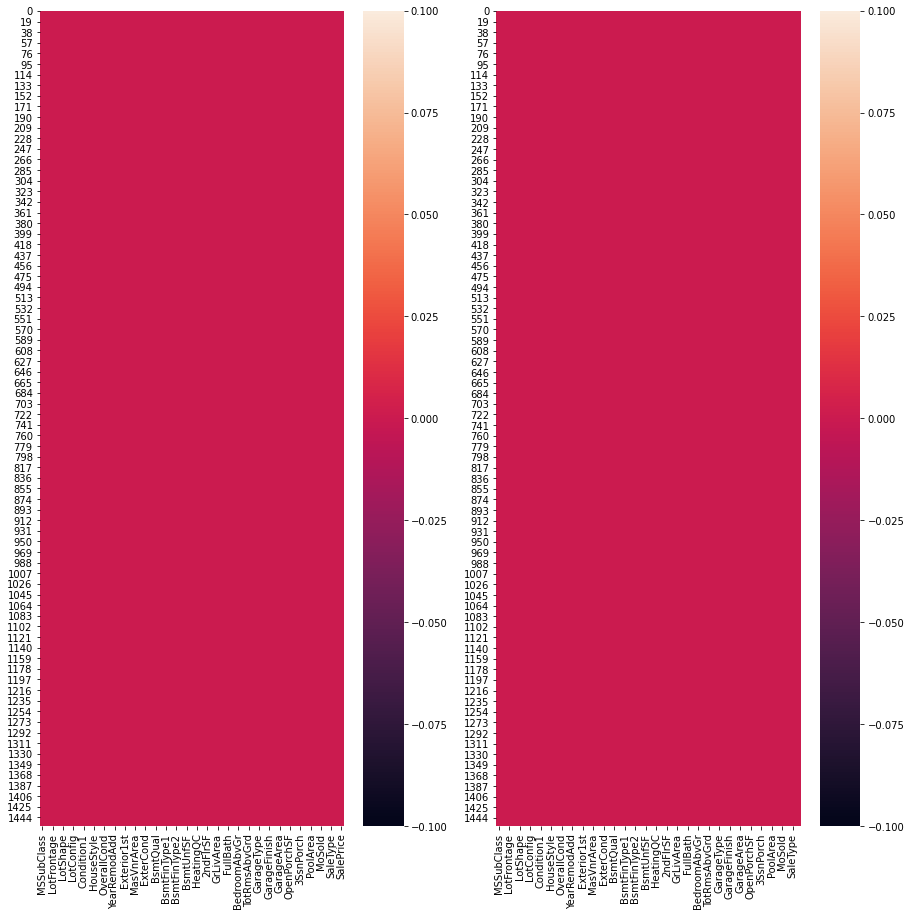

In [48]:
# confirm changes
fig, axes = plt.subplots(1, 2, figsize=(15,15))
sns.heatmap(df_train.isnull(), ax=axes[0])
sns.heatmap(df_test.isnull(), ax=axes[1])

## 3. Detect and remove outlires

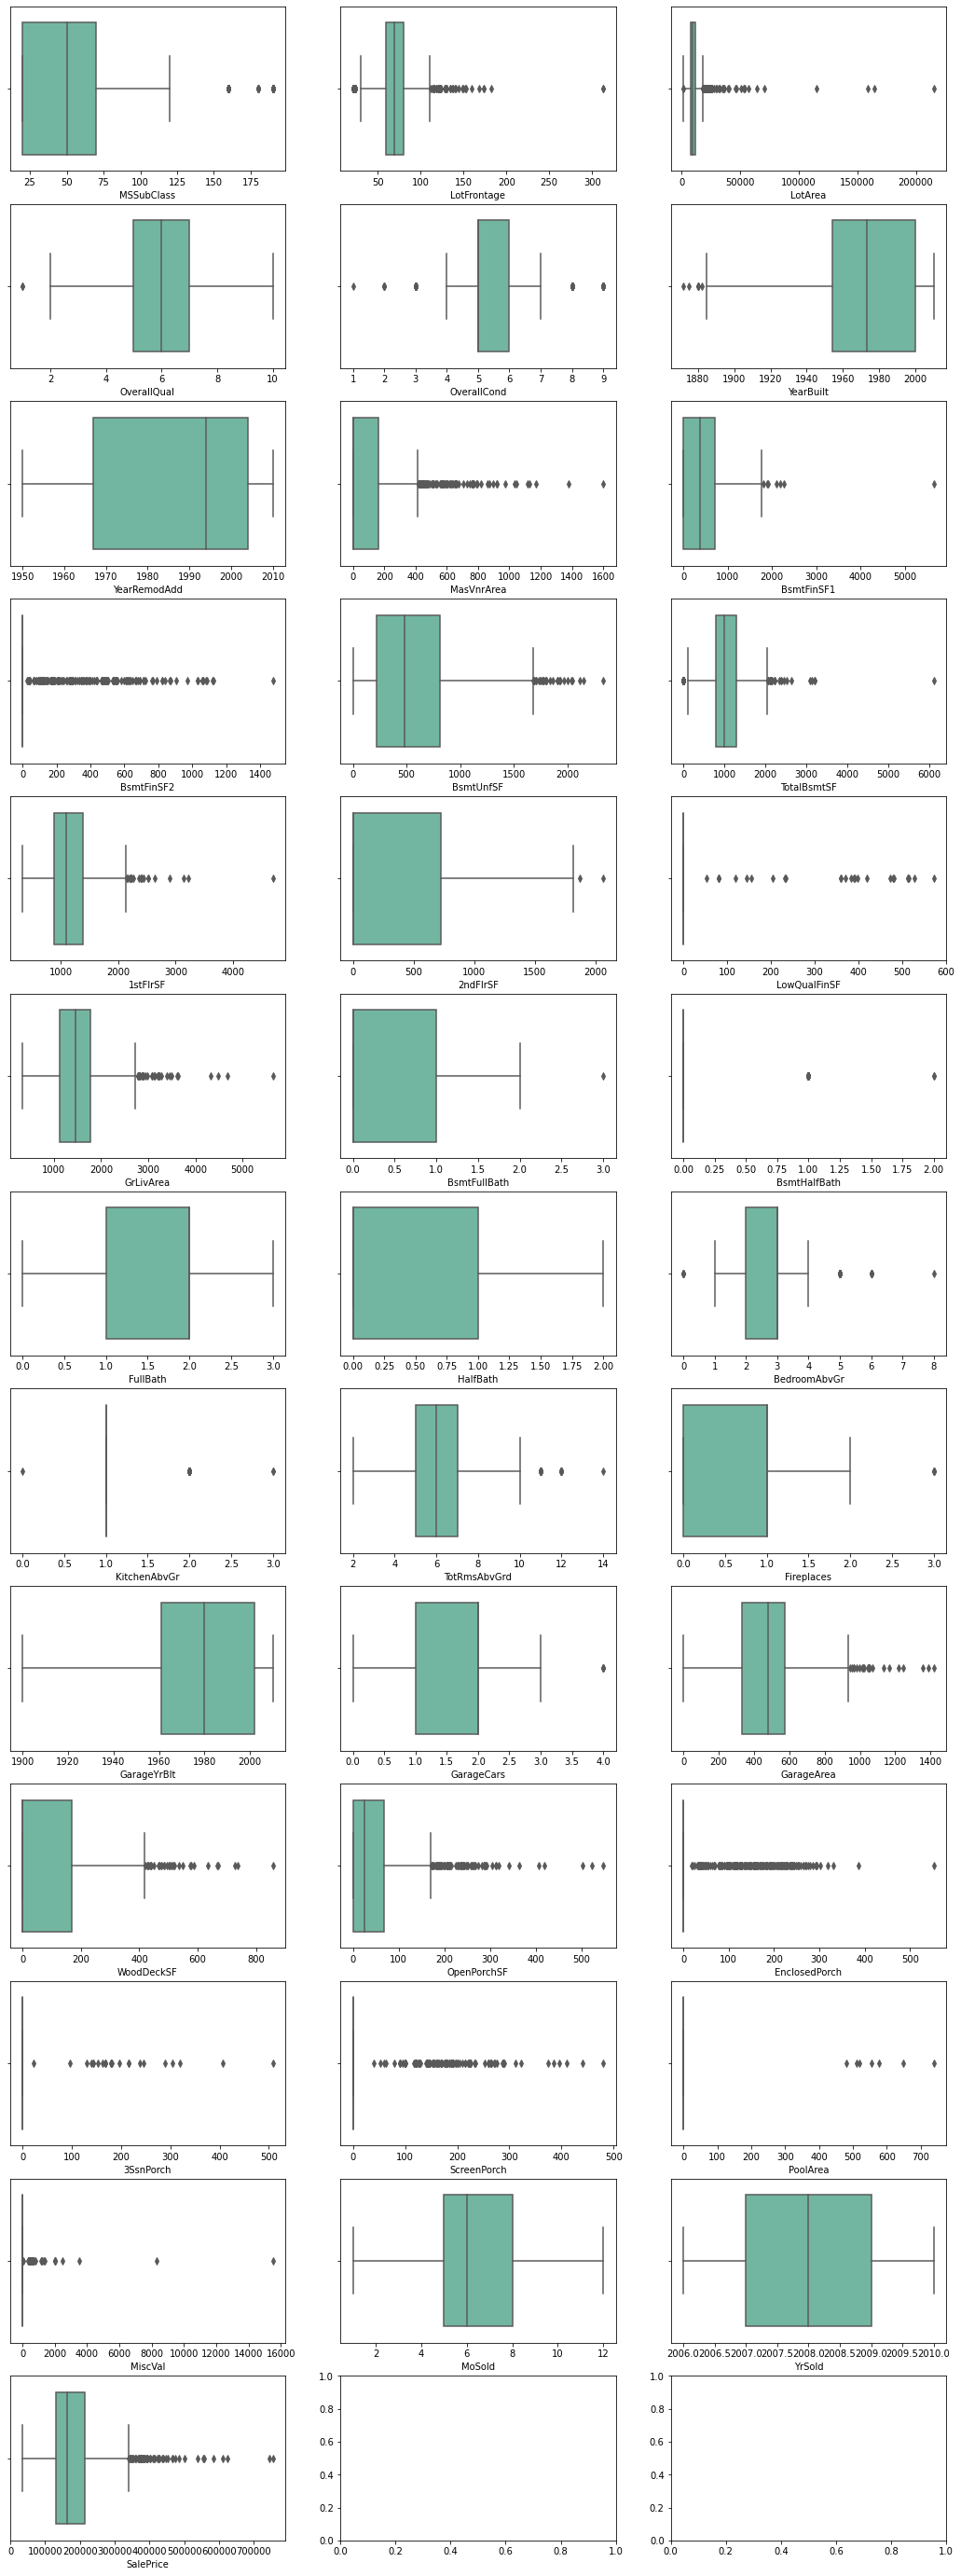

In [49]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in numerical_df_train.columns:
    if j==3:
        i += 1
        j = 0
        sns.boxplot(x=numerical_df_train[col],data=numerical_df_train, palette="Set2", ax=axes[i,j])
    else:
        sns.boxplot(x=numerical_df_train[col],data=numerical_df_train, palette="Set2", ax=axes[i,j])
    j += 1

In [50]:
Q1 = np.percentile(df_train['SalePrice'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df_train['SalePrice'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
# Upper bound
upper = np.where(df_train['SalePrice'] >= (Q3+1.5*IQR))
# lower bound
lower = np.where(df_train['SalePrice'] <= (Q1-1.5*IQR))
# drop outlires
df_train.drop(upper[0], errors='ignore', inplace = True)
df_train.drop(lower[0], errors='ignore', inplace = True)

<ipython-input-50-c90a77c69257>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_train['SalePrice'], 25, interpolation = 'midpoint')
<ipython-input-50-c90a77c69257>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df_train['SalePrice'], 75, interpolation = 'midpoint')


Kode ini bertujuan untuk mengatasi outlier dalam kolom 'SalePrice' pada dataset `df_train` dengan menggunakan metode Interquartile Range (IQR). Pertama, nilai kuartil pertama (Q1) dan kuartil ketiga (Q3) dihitung, dan IQR dihitung sebagai selisih antara keduanya. Selanjutnya, batas atas dan batas bawah untuk outlier dihitung dengan menambahkan dan mengurangkan 1.5 kali IQR dari Q3 dan Q1, masing-masing. Baris-baris yang memiliki nilai 'SalePrice' di atas batas atas atau di bawah batas bawah diidentifikasi menggunakan `np.where`, dan kemudian baris-baris tersebut dihapus dari dataset menggunakan fungsi `drop`. Tindakan ini bertujuan untuk membersihkan data dari nilai yang signifikan jauh dari nilai tengahnya, sehingga mencegah pengaruh outlier terhadap analisis statistik dan model yang dibangun.

In [51]:
# '''
# def remove_outlires(df, columns_list):
#     for col in columns_list:
#         Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
#         Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
#         IQR = Q3 - Q1
#         # Upper bound
#         upper = np.where(df[col] >= (Q3+1.5*IQR))
#         # lower bound
#         lower = np.where(df[col] <= (Q1-1.5*IQR))
#         # drop outlires
#         df.drop(upper[0], errors='ignore', inplace = True)
#         df.drop(lower[0], errors='ignore', inplace = True)
# '''

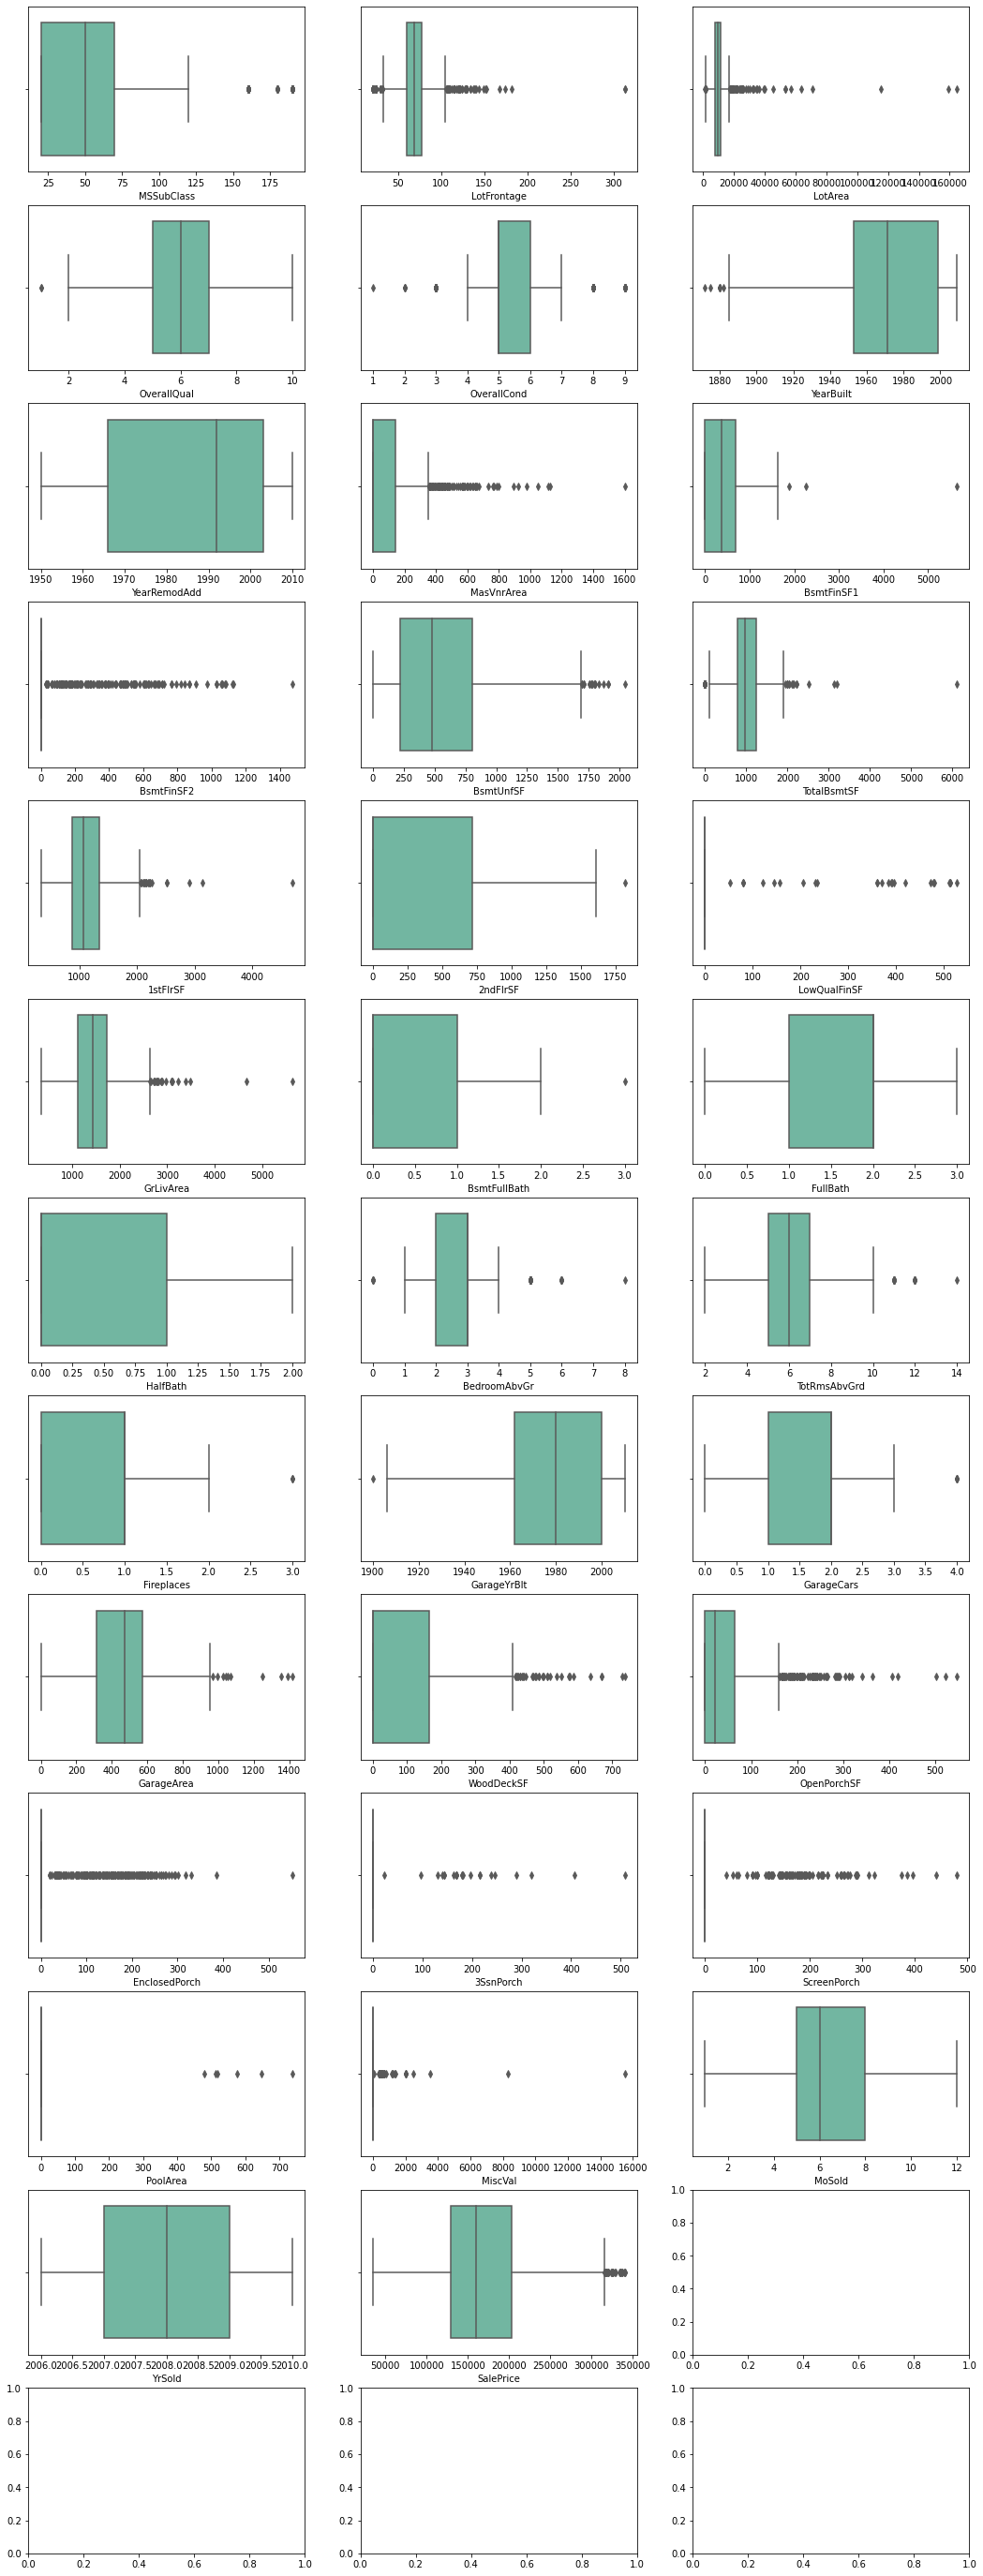

In [52]:
fig, axes = plt.subplots(13, 3, figsize=(18, 50))
i = 0
j = 0
for col in df_train:
    if col in numerical_cols:
        if j==3:
            i += 1
            j = 0
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        else:
            sns.boxplot(x=df_train[col],data=df_train, palette="Set2", ax=axes[i,j])
        j += 1

# Converting categorical values to numerical

In [53]:
numerical_cols_new = []
categorical_cols_new = []

for col in df_train.columns:
    if df_train[col].dtype in('int64','float64'):
        numerical_cols_new.append(df_train[col].name)
    else:
        categorical_cols_new.append(df_train[col].name)

In [54]:
train_dummies = pd.get_dummies(df_train[categorical_cols_new], drop_first=True)
test_dummies = pd.get_dummies(df_test[categorical_cols_new], drop_first=True)

In [55]:
df_train.drop(categorical_cols_new, axis=1, inplace=True)
df_test.drop(categorical_cols_new, axis=1, inplace=True)

In [56]:
df_train = df_train.join(train_dummies)
df_test = df_test.join(test_dummies)

In [57]:
for col in df_train:
    if (col not in df_test.columns) & (col != 'SalePrice'):
        df_train.drop(col, axis=1, inplace=True)
        
for col in df_test:
    if col not in df_train.columns:
        df_test.drop(col, axis=1, inplace=True)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Columns: 177 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(142), float64(3), int64(32)
memory usage: 619.8 KB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 176 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(142), float64(10), int64(24)
memory usage: 590.0 KB


In [60]:
# Menyimpan DataFrame df_train ke dalam file CSV
df_train.to_csv('df_train.csv', index=False)

# Menyimpan DataFrame df_test ke dalam file CSV
df_test.to_csv('df_test.csv', index=False)

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Preparing Data & Modeling</h1>

# Konsep Dasar Regression Linear

## Simple Linear

#### Splitting the data into training and test sets 

In [61]:
# Jumlah total data
total_data = len(df_train)

# Persentase pembagian (80% train, 20% test)
train_percentage = 0.8

# Jumlah data untuk training
train_size = int(total_data * train_percentage)

# Ambil data training
X_train = df_train['GarageArea'].iloc[:train_size].values
y_train = df_train['SalePrice'].iloc[:train_size].values

# Ambil data testing
X_test = df_train['GarageArea'].iloc[train_size:].values
y_test = df_train['SalePrice'].iloc[train_size:].values

# Output untuk memastikan pembagian yang benar
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))


Jumlah data training: 1119
Jumlah data testing: 280


In [62]:
X_train

array([548, 460, 608, ..., 776, 472, 540], dtype=int64)

### Manual Simple Linear

In [63]:
#berisikan perkalian antara x dan y
xy = []

# berisikan x^2 dan y^2
pangkat_x = []
pangkat_y = []

# Pastikan panjang data yang cukup
for i in range(len(X_train)) :
    xy.append(X_train[i] * y_train[i])
    pangkat_x.append(X_train[i] ** 2)
    pangkat_y.append(y_train[i] ** 2)

In [64]:
a = (sum(y_train) * sum(pangkat_x) - sum(X_train)*sum(xy)) / (len(X_train)*sum(pangkat_x) - (sum(X_train)**2))
b = ((len(X_train)*sum(xy)) - (sum(X_train)*sum(y_train))) / ((len(X_train)*sum(pangkat_x)) - sum(X_train)**2)

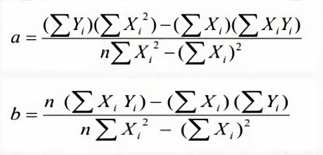

In [65]:
print(a) #intercept
print(b) #slope /coefficient

86033.9347926921
183.37995728909652


Dari hasil yang diberikan, tampaknya Anda mencetak nilai intercept dan slope (coefficient) dari model regresi linear yang telah dilatih. Dengan menggunakan notasi umum dari regresi linear, hasilnya dapat dibaca sebagai berikut:

- Intercept (a): \(86,033.93\)
  Ini adalah nilai konstan (nilai \(y\) ketika \(x\) sama dengan nol), yang menunjukkan harga rumah ketika luas garasi (\(x\)) adalah nol.

- Slope/Coefficient (b): \(183.38\)
  Ini adalah tingkat pertumbuhan harga rumah untuk setiap satu unit peningkatan luas garasi. Dengan kata lain, untuk setiap tambahan satuan luas garasi, harga rumah diperkirakan akan meningkat sebanyak \(183.38\) unit mata uang (misalnya, dollar).

Dengan informasi ini, kita dapat merumuskan persamaan regresi linear sebagai `SalePrice = 86033.93 + 183.38x`. Persamaan ini dapat digunakan untuk memprediksi harga rumah berdasarkan luas garasi.

In [66]:
for data in X_test:
    p = a + (b*data)
    print(f'Hasil Prediksi Harga Rumah Ketika GarageArea {data} sebesar {p}')

Hasil Prediksi Harga Rumah Ketika GarageArea 358 sebesar 151683.95950218866
Hasil Prediksi Harga Rumah Ketika GarageArea 433 sebesar 165437.4562988709
Hasil Prediksi Harga Rumah Ketika GarageArea 625 sebesar 200646.40809837743
Hasil Prediksi Harga Rumah Ketika GarageArea 0 sebesar 86033.9347926921
Hasil Prediksi Harga Rumah Ketika GarageArea 360 sebesar 152050.71941676683
Hasil Prediksi Harga Rumah Ketika GarageArea 541 sebesar 185242.49168609333
Hasil Prediksi Harga Rumah Ketika GarageArea 264 sebesar 134446.2435170136
Hasil Prediksi Harga Rumah Ketika GarageArea 210 sebesar 124543.72582340238
Hasil Prediksi Harga Rumah Ketika GarageArea 186 sebesar 120142.60684846406
Hasil Prediksi Harga Rumah Ketika GarageArea 0 sebesar 86033.9347926921
Hasil Prediksi Harga Rumah Ketika GarageArea 693 sebesar 213116.245194036
Hasil Prediksi Harga Rumah Ketika GarageArea 720 sebesar 218067.5040408416
Hasil Prediksi Harga Rumah Ketika GarageArea 995 sebesar 268496.99229534314
Hasil Prediksi Harga Ruma

### Simple Linear using LinearRegression()

In [67]:
# Regresi linear menggunakan scikit-learn untuk data pelatihan
X_train_reshaped = np.array(X_train).reshape(-1, 1)
lmodel = LinearRegression()
lmodel.fit(X_train_reshaped, y_train)

LinearRegression()

In [68]:
# Print koefisien scikit-learn
print("\nKoefisien Scikit-learn untuk data pelatihan:")
print(f"Intercept (a): {lmodel.intercept_}, Slope (b): {lmodel.coef_[0]}")


Koefisien Scikit-learn untuk data pelatihan:
Intercept (a): 86033.93479269215, Slope (b): 183.37995728909644


In [69]:
# Prediksi menggunakan model scikit-learn untuk data pengujian
X_test_reshaped = np.array(X_test).reshape(-1, 1)
prediksi_scikit = lmodel.predict(X_test_reshaped)

# Print prediksi untuk data pengujian
print("\nPrediksi Scikit-learn untuk data pengujian:")
for i, data in enumerate(X_test):
    print(f'Prediksi untuk input GarageArea {data}: {prediksi_scikit[i]}')


Prediksi Scikit-learn untuk data pengujian:
Prediksi untuk input GarageArea 358: 151683.95950218866
Prediksi untuk input GarageArea 433: 165437.4562988709
Prediksi untuk input GarageArea 625: 200646.4080983774
Prediksi untuk input GarageArea 0: 86033.93479269215
Prediksi untuk input GarageArea 360: 152050.71941676686
Prediksi untuk input GarageArea 541: 185242.49168609333
Prediksi untuk input GarageArea 264: 134446.24351701362
Prediksi untuk input GarageArea 210: 124543.7258234024
Prediksi untuk input GarageArea 186: 120142.60684846409
Prediksi untuk input GarageArea 0: 86033.93479269215
Prediksi untuk input GarageArea 693: 213116.245194036
Prediksi untuk input GarageArea 720: 218067.5040408416
Prediksi untuk input GarageArea 995: 268496.9922953431
Prediksi untuk input GarageArea 392: 157918.87805001796
Prediksi untuk input GarageArea 420: 163053.51685411265
Prediksi untuk input GarageArea 757: 224852.56246053817
Prediksi untuk input GarageArea 493: 176440.2537362167
Prediksi untuk in

In [70]:
# Menghitung MAE, RMSE, dan R2
mae_sl = mean_absolute_error(y_test, prediksi_scikit)
rmse_sl = np.sqrt(mean_squared_error(y_test, prediksi_scikit))
r2_sl = r2_score(y_test, prediksi_scikit)

# Tampilkan hasil
print(f'MAE (Mean Absolute Error): {mae_sl}')
print(f'RMSE (Root Mean Squared Error): {rmse_sl}')
print(f'R2 (R-squared): {r2_sl}')

MAE (Mean Absolute Error): 36417.47005954596
RMSE (Root Mean Squared Error): 48661.95667475978
R2 (R-squared): 0.3070959663171269


### Uji Asumsi Simple Linear

##### Linearity

In [71]:
# Fungsi untuk menghitung residual
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = df_results['Actual'] - df_results['Predicted']
    return df_results

# Fungsi untuk menguji asumsi linearitas
def linear_assumption(model, features, label):
    print('Asumsi 1: Hubungan Linear antara Target dan Fitur', '\n')
        
    print('Mengecek dengan scatter plot antara nilai aktual dan prediksi. Prediksi seharusnya mengikuti garis diagonal.')
    
    df_results = calculate_residuals(model, features, label)
    
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Aktual vs. Prediksi')
    plt.show()

Asumsi 1: Hubungan Linear antara Target dan Fitur 

Mengecek dengan scatter plot antara nilai aktual dan prediksi. Prediksi seharusnya mengikuti garis diagonal.


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


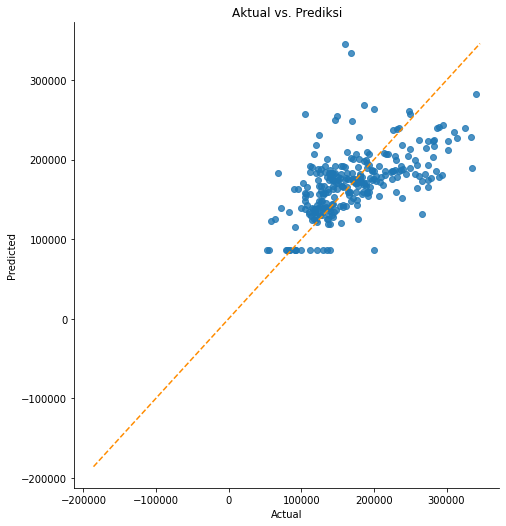

In [72]:
linear_assumption(lmodel, X_test_reshaped, y_test)

##### Normalitas Ketentuan Kesalahan

In [73]:
# Fungsi untuk menguji asumsi normalitas dari error terms
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    print('Asumsi 2: Error Terms memiliki distribusi normal', '\n')
    
    # Menghitung residual untuk uji Anderson-Darling
    df_results = calculate_residuals(model, features, label)
    
    print('Menggunakan uji Anderson-Darling untuk distribusi normal')

    # Melakukan uji pada residual
    p_value = normal_ad(df_results['Residuals'])[1]
    print('Nilai p dari uji - di bawah 0.05 umumnya berarti tidak normal:', p_value)
    
    # Melaporkan hasil normalitas dari residual
    if p_value < p_value_thresh:
        print('Residuals tidak memiliki distribusi normal')
    else:
        print('Residuals memiliki distribusi normal')
    
    # Plot distribusi residual
    plt.subplots(figsize=(12, 6))
    plt.title('Distribusi Residual')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Asumsi terpenuhi')
    else:
        print('Asumsi tidak terpenuhi')
        print()
        print('Interval kepercayaan kemungkinan akan terpengaruh')
        print('Coba lakukan transformasi nonlinear pada variabel')

Asumsi 2: Error Terms memiliki distribusi normal 

Menggunakan uji Anderson-Darling untuk distribusi normal
Nilai p dari uji - di bawah 0.05 umumnya berarti tidak normal: 0.0016023951645804033
Residuals tidak memiliki distribusi normal


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


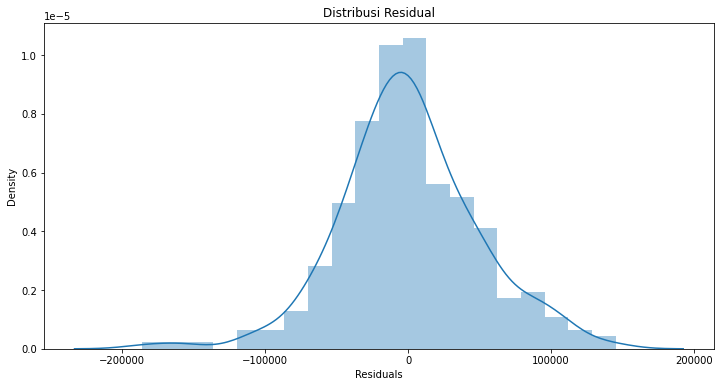


Asumsi tidak terpenuhi

Interval kepercayaan kemungkinan akan terpengaruh
Coba lakukan transformasi nonlinear pada variabel


In [74]:
normal_errors_assumption(lmodel, X_test_reshaped, y_test)

##### Tidak Ada Multikolinearitas Antar Prediktor (No Multicollinearity among Predictors)

In [75]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    print('Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor', '\n')

    # Plot heatmap korelasi antar variabel
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Korelasi Variabel')
    plt.show()

    print('Variance Inflation Factors (VIF)')
    print('> 10: Indikasi bahwa multicollinearity mungkin ada')
    print('> 100: Multicollinearity pasti ada di antara variabel')
    print('-------------------------------------')

    # Menghitung VIF untuk setiap variabel
    VIF = []
    for i in range(features.shape[1]):
        try:
            vif = variance_inflation_factor(features, i)
            print('{0}: {1}'.format(feature_names[i], vif))
            VIF.append(vif)
        except Exception as e:
            print('{0}: {1}'.format(feature_names[i], 'Error'))
            VIF.append(np.nan)

    # Menghitung dan mencetak total kasus mungkin atau pasti multicollinearity
    possible_multicollinearity = sum(1 for vif in VIF if not np.isnan(vif) and vif > 10)
    definite_multicollinearity = sum(1 for vif in VIF if not np.isnan(vif) and vif > 100)
    print()
    print('{0} kasus mungkin multicollinearity'.format(possible_multicollinearity))
    print('{0} kasus pasti multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Asumsi terpenuhi')
        else:
            print('Asumsi mungkin terpenuhi')
            print()
            print('Interpretasi koefisien mungkin bermasalah')
            print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')

    else:
        print('Asumsi tidak terpenuhi')
        print()
        print('Interpretasi koefisien akan bermasalah')
        print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')


Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor 



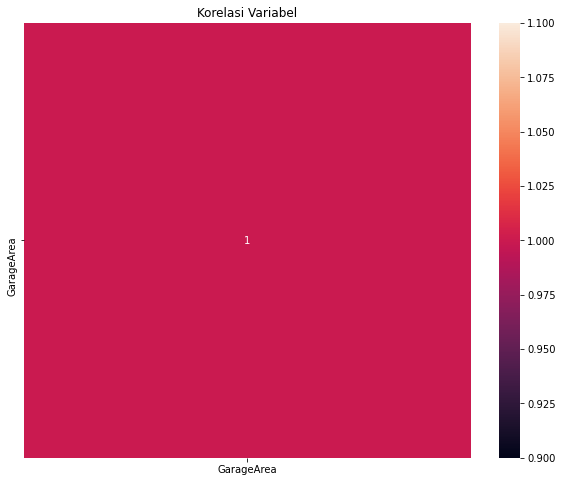

Variance Inflation Factors (VIF)
> 10: Indikasi bahwa multicollinearity mungkin ada
> 100: Multicollinearity pasti ada di antara variabel
-------------------------------------
GarageArea: Error

0 kasus mungkin multicollinearity
0 kasus pasti multicollinearity

Asumsi terpenuhi


In [76]:
# Memanggil fungsi multicollinearity_assumption
multicollinearity_assumption(lmodel, X_test_reshaped, y_test, feature_names=['GarageArea'])

##### Tidak Ada Autokorelasi Ketentuan Kesalahan ( No Autocorrelation of the Error Terms)

In [77]:
# Fungsi untuk menguji asumsi autocorrelation
def autocorrelation_assumption(model, features, label):
    print('Asumsi 4: Tidak ada Autocorrelation', '\n')
    
    # Menghitung residual untuk uji Durbin-Watson
    df_results = calculate_residuals(model, features, label)

    print('\nMelakukan Uji Durbin-Watson')
    print('Nilai 1.5 < d < 2.5 umumnya menunjukkan tidak ada autocorrelation pada data')
    print('0 hingga 2 adalah positif autocorrelation')
    print('>2 hingga 4 adalah negatif autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Tanda-tanda positif autocorrelation', '\n')
        print('Asumsi tidak terpenuhi')
    elif durbinWatson > 2.5:
        print('Tanda-tanda negatif autocorrelation', '\n')
        print('Asumsi tidak terpenuhi')
    else:
        print('Tidak ada autocorrelation atau sangat sedikit', '\n')
        print('Asumsi terpenuhi') 

In [78]:
autocorrelation_assumption(lmodel, X_test_reshaped, y_test)

Asumsi 4: Tidak ada Autocorrelation 


Melakukan Uji Durbin-Watson
Nilai 1.5 < d < 2.5 umumnya menunjukkan tidak ada autocorrelation pada data
0 hingga 2 adalah positif autocorrelation
>2 hingga 4 adalah negatif autocorrelation
-------------------------------------
Durbin-Watson: 1.9359286907013458
Tidak ada autocorrelation atau sangat sedikit 

Asumsi terpenuhi


## Mutiple Linear

#### Splitting the data into training and test sets 

In [79]:
# Jumlah total data
total_data = len(df_train)

# Persentase pembagian (80% train, 20% test)
train_percentage = 0.8

# Jumlah data untuk training
train_size = int(total_data * train_percentage)

# Ambil data training
X_train = df_train[['GarageArea', 'BedroomAbvGr']].iloc[:train_size].values
y_train = df_train['SalePrice'].iloc[:train_size].values

# Ambil data testing
X_test = df_train[['GarageArea', 'BedroomAbvGr']].iloc[train_size:].values
y_test = df_train['SalePrice'].iloc[train_size:].values

# Output untuk memastikan pembagian yang benar
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 1119
Jumlah data testing: 280


### Manual Mutiple Linear

In [80]:
# Manual Multiple Linear Regression
y = y_train.copy()
x1 = X_train[:, 0]  # GarageArea
x2 = X_train[:, 1]  # BedroomAbvGr


2. **Multiple Linear**

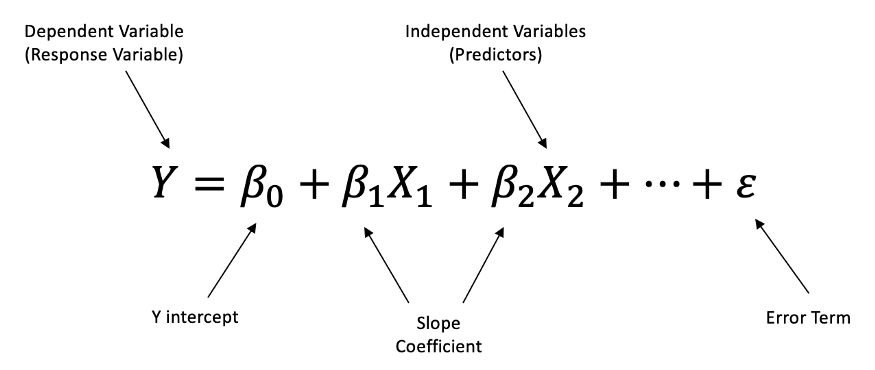

In [81]:
# Hitung jumlah data
n = len(y)

# Hitung berbagai jumlah dan produk yang diperlukan
sum_y = np.sum(y)
sum_x1 = np.sum(x1)
sum_x2 = np.sum(x2)
sum_x1y = np.sum(x1 * y)
sum_x2y = np.sum(x2 * y)
sum_x1x1 = np.sum(x1**2)
sum_x2x2 = np.sum(x2**2)
sum_x1x2 = np.sum(x1 * x2)

# Hitung parameter regresi
denominator = n * sum_x1x1 - sum_x1**2
a = (sum_y * sum_x1x1 - sum_x1 * sum_x1y) / denominator
b1 = (n * sum_x1y - sum_x1 * sum_y) / denominator
b2 = (n * sum_x2y - sum_x2 * sum_y) / denominator

# Hasil prediksi untuk k_input
k_input_x1_test = X_test[:, 0]
k_input_x2_test = X_test[:, 1]

for i in range(len(k_input_x1_test)):
    p = a + b1 * k_input_x1_test[i] + b2 * k_input_x2_test[i]
    print(f'Hasil Prediksi Y untuk X1={k_input_x1_test[i]}, X2={k_input_x2_test[i]} adalah {p}')

Hasil Prediksi Y untuk X1=358, X2=3 adalah 151684.71808570152
Hasil Prediksi Y untuk X1=433, X2=3 adalah 165438.21488238376
Hasil Prediksi Y untuk X1=625, X2=2 adalah 200646.91382071935
Hasil Prediksi Y untuk X1=0, X2=3 adalah 86034.69337620496
Hasil Prediksi Y untuk X1=360, X2=4 adalah 152051.73086145066
Hasil Prediksi Y untuk X1=541, X2=4 adalah 185243.50313077716
Hasil Prediksi Y untuk X1=264, X2=3 adalah 134447.00210052644
Hasil Prediksi Y untuk X1=210, X2=3 adalah 124544.48440691523
Hasil Prediksi Y untuk X1=186, X2=3 adalah 120143.36543197691
Hasil Prediksi Y untuk X1=0, X2=3 adalah 86034.69337620496
Hasil Prediksi Y untuk X1=693, X2=4 adalah 213117.25663871982
Hasil Prediksi Y untuk X1=720, X2=2 adalah 218068.0097631835
Hasil Prediksi Y untuk X1=995, X2=3 adalah 268497.750878856
Hasil Prediksi Y untuk X1=392, X2=4 adalah 157919.88949470175
Hasil Prediksi Y untuk X1=420, X2=3 adalah 163054.2754376255
Hasil Prediksi Y untuk X1=757, X2=2 adalah 224853.0681828801
Hasil Prediksi Y un

In [82]:
print("Koefisien regresi (a):", a)
print("Koefisien regresi (b1):", b1)
print("Koefisien regresi (b2):", b2)

Koefisien regresi (a): 86033.9347926921
Koefisien regresi (b1): 183.37995728909652
Koefisien regresi (b2): 0.2528611709532962


### Mutiple Linear using LinearRegression()

In [83]:
# Mutiple Linear using LinearRegression()
X_train_matrix = np.column_stack((X_train[:, 0], X_train[:, 1]))

# Inisialisasi model regresi linear
model = LinearRegression()

# Melatih model
model.fit(X_train_matrix, y_train)

LinearRegression()

In [84]:
# Koefisien regresi
print("Intercept (a):", model.intercept_)
print("Koefisien regresi (b1, GarageArea):", model.coef_[0])
print("Koefisien regresi (b2, BedroomAbvGr):", model.coef_[1])

# Prediksi menggunakan model scikit-learn untuk data pengujian
predictions = model.predict(X_test)

# Print prediksi untuk data pengujian
for i, pred in enumerate(predictions):
    print(f'Prediksi untuk data testing ke-{i + 1}: {pred}')

Intercept (a): 53933.821170528565
Koefisien regresi (b1, GarageArea): 179.57506277680983
Koefisien regresi (b2, BedroomAbvGr): 11893.398904222435
Prediksi untuk data testing ke-1: 153901.89035729377
Prediksi untuk data testing ke-2: 167370.02006555453
Prediksi untuk data testing ke-3: 189955.03321447957
Prediksi untuk data testing ke-4: 89614.01788319586
Prediksi untuk data testing ke-5: 166154.43938706984
Prediksi untuk data testing ke-6: 198657.5257496724
Prediksi untuk data testing ke-7: 137021.83445627365
Prediksi untuk data testing ke-8: 127324.78106632593
Prediksi untuk data testing ke-9: 123014.9795596825
Prediksi untuk data testing ke-10: 89614.01788319586
Prediksi untuk data testing ke-11: 225952.9352917475
Prediksi untuk data testing ke-12: 207014.66417827652
Prediksi untuk data testing ke-13: 268291.2053461217
Prediksi untuk data testing ke-14: 171900.84139592777
Prediksi untuk data testing ke-15: 165035.544249456
Prediksi untuk data testing ke-16: 213658.94150101847
Prediks

In [85]:
# Menghitung MAE, RMSE, dan R2
mae_ml = mean_absolute_error(y_test, predictions)
rmse_ml = np.sqrt(mean_squared_error(y_test, predictions))
r2_ml = r2_score(y_test, predictions)

# Tampilkan hasil
print(f'MAE (Mean Absolute Error): {mae_ml}')
print(f'RMSE (Root Mean Squared Error): {rmse_ml}')
print(f'R2 (R-squared): {r2_ml}')

MAE (Mean Absolute Error): 35638.76817209402
RMSE (Root Mean Squared Error): 48052.904923439106
R2 (R-squared): 0.3243321599800516


### Uji Asumsi Simple Linear

##### Linearity

Asumsi 1: Hubungan Linear antara Target dan Fitur 

Mengecek dengan scatter plot antara nilai aktual dan prediksi. Prediksi seharusnya mengikuti garis diagonal.


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


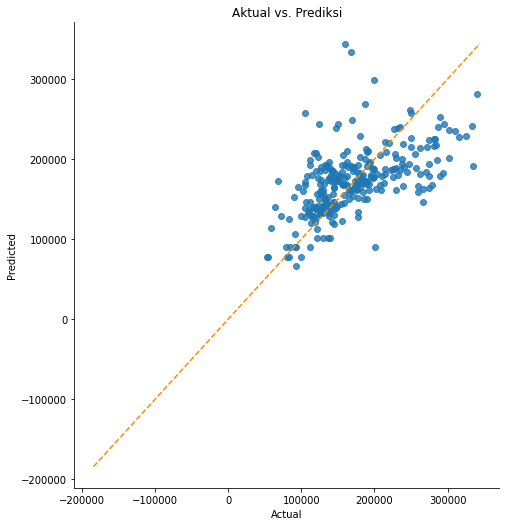

In [86]:
linear_assumption(model, X_test, y_test)

##### Normalitas Ketentuan Kesalahan

Asumsi 2: Error Terms memiliki distribusi normal 

Menggunakan uji Anderson-Darling untuk distribusi normal
Nilai p dari uji - di bawah 0.05 umumnya berarti tidak normal: 0.00019387573398534183
Residuals tidak memiliki distribusi normal


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


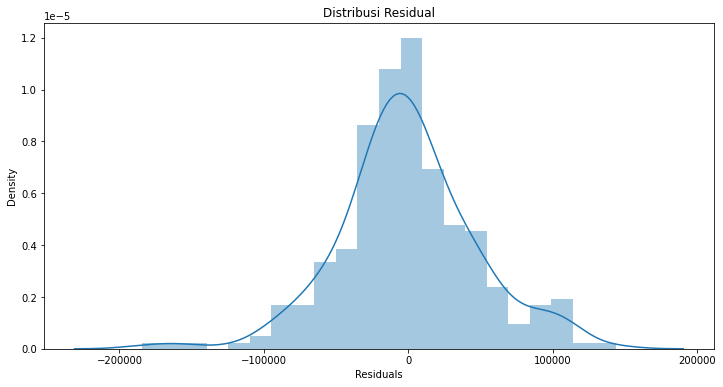


Asumsi tidak terpenuhi

Interval kepercayaan kemungkinan akan terpengaruh
Coba lakukan transformasi nonlinear pada variabel


In [87]:
normal_errors_assumption(model, X_test, y_test)

##### Tidak Ada Multikolinearitas Antar Prediktor (No Multicollinearity among Predictors)

In [88]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    print('Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor', '\n')
        
    # Plot heatmap korelasi antar variabel
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Korelasi Variabel')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: Indikasi bahwa multicollinearity mungkin ada')
    print('> 100: Multicollinearity pasti ada di antara variabel')
    print('-------------------------------------')

    # Ubah array NumPy menjadi DataFrame
    df_features = pd.DataFrame(features, columns=feature_names)

    # Memilih kolom-kolom numerik
    numeric_features = df_features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = []  # Menyimpan nama kolom dengan VIF > 10
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        if vif > 10:
            high_vif_columns.append(feature_names[idx])
        
    # Menghitung dan mencetak total kasus mungkin atau pasti multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} kasus mungkin multicollinearity'.format(possible_multicollinearity))
    print('{0} kasus pasti multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Asumsi terpenuhi')
        else:
            print('Asumsi mungkin terpenuhi')
            print()
            print('Interpretasi koefisien mungkin bermasalah')
            print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
    else:
        print('Asumsi tidak terpenuhi')
        print()
        print('Interpretasi koefisien akan bermasalah')
        print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
        print('Variabel dengan VIF > 10:', high_vif_columns)
    
    return high_vif_columns

# Fungsi untuk mendapatkan kolom-kolom dengan VIF > 10
def high_vif_columns(features, feature_names, threshold=10):
    # Memilih kolom-kolom numerik
    numeric_features = features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = [feature_names[idx] for idx, vif in enumerate(VIF) if vif > threshold]
    
    return high_vif_columns


Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor 



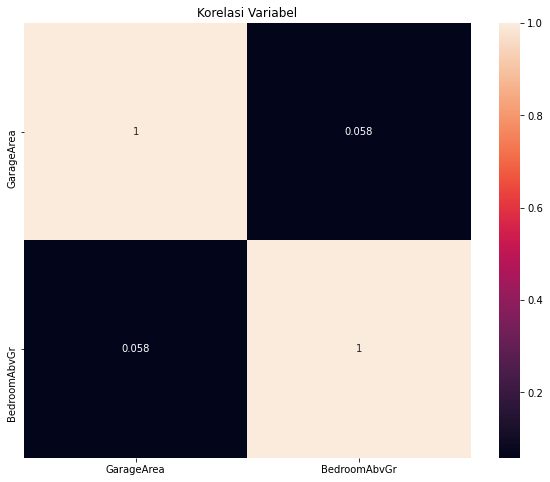

Variance Inflation Factors (VIF)
> 10: Indikasi bahwa multicollinearity mungkin ada
> 100: Multicollinearity pasti ada di antara variabel
-------------------------------------
GarageArea: 4.451713894289533
BedroomAbvGr: 4.451713894289533

0 kasus mungkin multicollinearity
0 kasus pasti multicollinearity

Asumsi terpenuhi


[]

In [89]:
multicollinearity_assumption(model, X_test, y_test, feature_names=['GarageArea','BedroomAbvGr'])

##### Tidak Ada Autokorelasi Ketentuan Kesalahan ( No Autocorrelation of the Error Terms)

In [90]:
autocorrelation_assumption(model, X_test, y_test)

Asumsi 4: Tidak ada Autocorrelation 


Melakukan Uji Durbin-Watson
Nilai 1.5 < d < 2.5 umumnya menunjukkan tidak ada autocorrelation pada data
0 hingga 2 adalah positif autocorrelation
>2 hingga 4 adalah negatif autocorrelation
-------------------------------------
Durbin-Watson: 1.9379554632258946
Tidak ada autocorrelation atau sangat sedikit 

Asumsi terpenuhi


# Build Linear Regression Model

## Splitting the data into training and test sets 

In [91]:
# response variable
y = df_train['SalePrice']
# explanatory variable
X = df_train.drop('SalePrice', axis=1)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## build model and fit data

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression()

## model prediction

In [95]:
y_pred = lmodel.predict(X_test)

## model evaluation

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [97]:
mae = mean_absolute_error(y_test,y_pred)

In [98]:
# RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

In [99]:
# R^2
r2 = r2_score(y_test,y_pred)

In [100]:
# Print koefisien dan intercept
print('Koefisien:', lmodel.coef_)
print('Intercept:', lmodel.intercept_)

Koefisien: [-3.12185482e+00 -1.38184759e+02  1.97638123e-01  7.81442713e+03
  4.96590989e+03  1.17112705e+02  8.42872822e+01 -2.98669499e-01
 -2.53575725e+00  4.38972558e+00  6.51824312e-01  2.50579400e+00
  5.42808934e+00  1.74820652e+01  3.42310150e+00  2.63332550e+01
  6.59847288e+03  3.53821552e+03  1.27612478e+03  2.08789054e+03
  2.76998843e+02  6.11193831e+03 -4.17118031e+01  7.95325264e+03
  1.10986962e+01  2.19650898e+01  1.39064249e+01  1.96674108e+01
  4.69546985e+01  3.37295731e+01 -5.82241763e+00 -5.59730175e-02
 -4.87699643e+01 -7.95808617e+02  2.94565408e+04  3.13589247e+04
  2.97957713e+04  2.07597880e+04  4.53371483e+03 -4.67880349e+04
 -6.88907918e+02  2.06327084e+04  1.94037519e+04  1.30342625e+04
  3.93969436e+03 -8.99174777e+03 -1.62952134e+04 -1.35955630e+03
 -1.39148391e+04  7.07827407e+03 -7.33299916e+03 -4.04078911e+03
 -5.63618208e+03  6.42100291e+03 -2.20581709e+04 -9.75930825e+03
 -1.13596135e+04 -2.46405065e+04 -1.71660696e+04 -1.64145884e+04
 -1.64809081e+

## predict test dataframe 

In [101]:
subm_preds = lmodel.predict(df_test)
subm_preds

array([116992.51301411, 153188.08935279, 176573.30943577, ...,
       154153.93130766, 103081.002398  , 198472.29354177])

In [102]:
hasil = pd.DataFrame({
        "Id": id_test_list,
        "SalePrice": subm_preds})

In [103]:
hasil.head()

,Id,SalePrice
0,1461,116992.513014
1,1462,153188.089353
2,1463,176573.309436
3,1464,193894.435740
4,1465,205416.297774


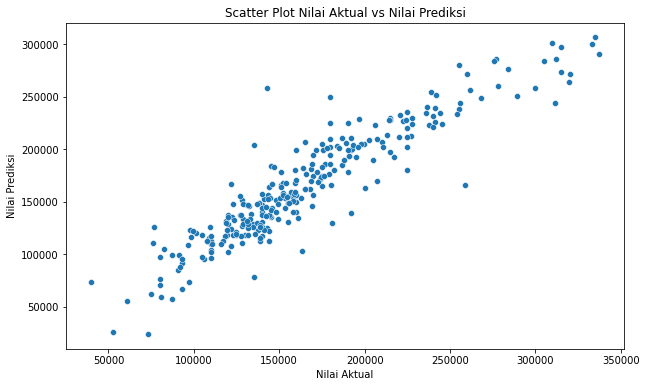

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot nilai aktual vs nilai prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Scatter Plot Nilai Aktual vs Nilai Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()


## Uji Asumsi Sebelum diperbaiki (1x)

##### Linearity

Asumsi 1: Hubungan Linear antara Target dan Fitur 

Mengecek dengan scatter plot antara nilai aktual dan prediksi. Prediksi seharusnya mengikuti garis diagonal.


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


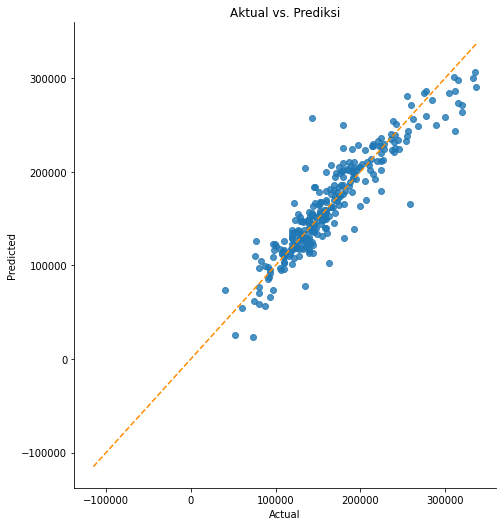

In [105]:
linear_assumption(lmodel, X_test, y_test)

Memenuhi Asumsi 1, yaitu hubungan linear antara target dan fitur, sangat penting dalam regresi linear. Jika hubungan ini tidak terpenuhi, dapat menyebabkan kesalahan interpretasi dan prediksi yang tidak akurat. Dropping outliers (menghapus nilai-nilai yang dianggap sebagai outlier) adalah satu pendekatan yang dapat diambil untuk membantu memenuhi asumsi hubungan linear,

##### Normalitas Ketentuan Kesalahan

Asumsi 2: Error Terms memiliki distribusi normal 

Menggunakan uji Anderson-Darling untuk distribusi normal
Nilai p dari uji - di bawah 0.05 umumnya berarti tidak normal: 1.2998057129842626e-07
Residuals tidak memiliki distribusi normal


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


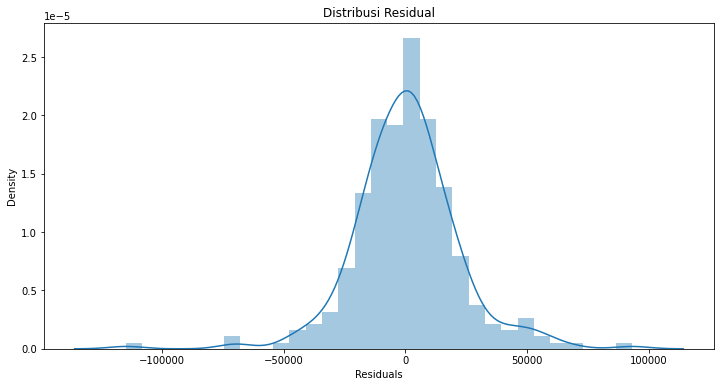


Asumsi tidak terpenuhi

Interval kepercayaan kemungkinan akan terpengaruh
Coba lakukan transformasi nonlinear pada variabel


In [106]:
normal_errors_assumption(lmodel, X_test, y_test)

##### Tidak Ada Multikolinearitas Antar Prediktor (No Multicollinearity among Predictors)

In [107]:
# Fungsi untuk menguji asumsi multicollinearity dan menyimpan nama kolom dengan VIF > 10
def multicollinearity_assumption(model, features, label, feature_names=None):
    print('Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor', '\n')
        
    # Plot heatmap korelasi antar variabel
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Korelasi Variabel')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: Indikasi bahwa multicollinearity mungkin ada')
    print('> 100: Multicollinearity pasti ada di antara variabel')
    print('-------------------------------------')

    # Memilih kolom-kolom numerik
    numeric_features = features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = []  # Menyimpan nama kolom dengan VIF > 10
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        if vif > 10:
            high_vif_columns.append(feature_names[idx])
        
    # Menghitung dan mencetak total kasus mungkin atau pasti multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} kasus mungkin multicollinearity'.format(possible_multicollinearity))
    print('{0} kasus pasti multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Asumsi terpenuhi')
        else:
            print('Asumsi mungkin terpenuhi')
            print()
            print('Interpretasi koefisien mungkin bermasalah')
            print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
    else:
        print('Asumsi tidak terpenuhi')
        print()
        print('Interpretasi koefisien akan bermasalah')
        print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
        print('Variabel dengan VIF > 10:', high_vif_columns)
    
    return high_vif_columns  # Menambahkan return statement


# Fungsi untuk mendapatkan kolom-kolom dengan VIF > 10
def high_vif_columns(features, feature_names, threshold=10):
    # Memilih kolom-kolom numerik
    numeric_features = features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = [feature_names[idx] for idx, vif in enumerate(VIF) if vif > threshold]
    
    return high_vif_columns


Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor 



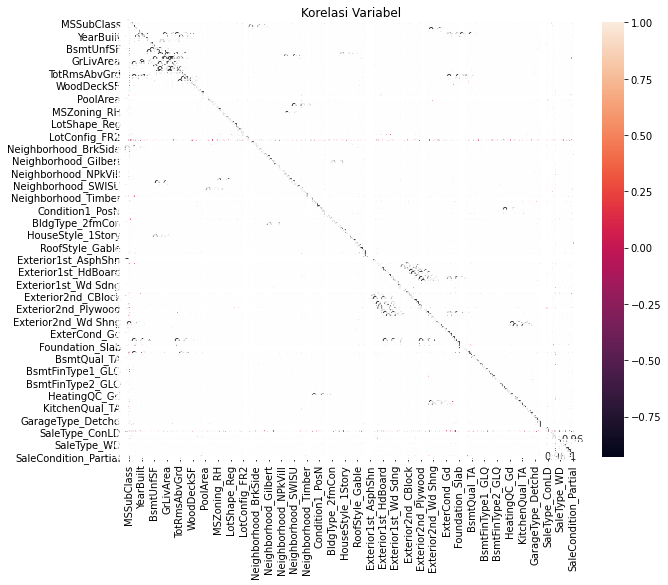

Variance Inflation Factors (VIF)
> 10: Indikasi bahwa multicollinearity mungkin ada
> 100: Multicollinearity pasti ada di antara variabel
-------------------------------------
MSSubClass: 4.413222539130922
LotFrontage: 19.70359805677763
LotArea: 2.647908263730246
OverallQual: 63.78526253237356
OverallCond: 43.364135132115045
YearBuilt: 27432.39563963466
YearRemodAdd: 23223.42770007495
MasVnrArea: 1.702389532915847
BsmtFinSF1: inf
BsmtFinSF2: inf
BsmtUnfSF: inf
TotalBsmtSF: inf
1stFlrSF: inf
2ndFlrSF: inf
LowQualFinSF: inf
GrLivArea: inf
BsmtFullBath: 3.64578516950648
FullBath: 29.397066780072844
HalfBath: 3.5062881810476467
BedroomAbvGr: 34.883930788656635
TotRmsAbvGrd: 86.39358888873386
Fireplaces: 3.0741143723900857
GarageYrBlt: 25968.32366034306
GarageCars: 40.638451476061874
GarageArea: 34.67270562635558
WoodDeckSF: 1.7463673442611285
OpenPorchSF: 1.9090905064386028
EnclosedPorch: 1.5084497975953937
3SsnPorch: 1.1171902233226734
ScreenPorch: 1.3076028448178922
PoolArea: nan
MiscVal

C:\Users\Thesion\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Thesion\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


['LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'YrSold']

In [108]:
multicollinearity_assumption(lmodel, X_test, y_test, feature_names=X_train.columns)

In [109]:
high_vif_columns = high_vif_columns(X_test, feature_names=X_train.columns)
high_vif_columns

['LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'YrSold']

##### Tidak Ada Autokorelasi Ketentuan Kesalahan ( No Autocorrelation of the Error Terms)

In [110]:
autocorrelation_assumption(lmodel, X_test, y_test)

Asumsi 4: Tidak ada Autocorrelation 


Melakukan Uji Durbin-Watson
Nilai 1.5 < d < 2.5 umumnya menunjukkan tidak ada autocorrelation pada data
0 hingga 2 adalah positif autocorrelation
>2 hingga 4 adalah negatif autocorrelation
-------------------------------------
Durbin-Watson: 1.995375881063644
Tidak ada autocorrelation atau sangat sedikit 

Asumsi terpenuhi


## Perbaiki data untuk uji asumsi yang tidak terpenuhi (1)

### Tidak memenuhi Asumsi 1 
Sehingga drop outlier 

Memenuhi Asumsi 1, yaitu hubungan linear antara target dan fitur, sangat penting dalam regresi linear. Jika hubungan ini tidak terpenuhi, dapat menyebabkan kesalahan interpretasi dan prediksi yang tidak akurat. Dropping outliers (menghapus nilai-nilai yang dianggap sebagai outlier) adalah satu pendekatan yang dapat diambil untuk membantu memenuhi asumsi hubungan linear,

In [111]:
# Fungsi untuk mendeteksi outlier berdasarkan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers


In [112]:
# Menghitung residual
df_results1 = calculate_residuals(lmodel, X_train, y_train)
df_results2 = calculate_residuals(lmodel, X_test, y_test)
df_results2.head()

,Actual,Predicted,Residuals
703,140000,130365.284566,9634.715434
656,145500,144100.265665,1399.734335
119,163990,181694.792446,-17704.792446
502,140000,147221.798823,-7221.798823
243,120000,128996.463646,-8996.463646


In [113]:
# Mendeteksi outlier pada residual
outliers1 = detect_outliers_iqr(df_results1['Residuals'])
outliers2 = detect_outliers_iqr(df_results2['Residuals'])
outliers2.head()

703    False
656    False
119    False
502    False
243    False
Name: Residuals, dtype: bool

In [114]:
# Menampilkan nilai residual untuk outlier
outlier_values1 = df_results1.loc[outliers1, 'Residuals']
outlier_values2 = df_results2.loc[outliers2, 'Residuals']
# Menampilkan outlier
outlier_values2

763      46452.276456
264      49013.329597
45       55590.845739
744     -45428.523198
1006     60585.213239
607      45122.833667
932      48755.081625
1260     51641.321036
560     -45440.593090
250     -49121.923609
66      -69938.230505
628     -69356.565893
970      56723.201664
1127     93115.544931
588    -114901.289355
218      67470.996444
1430     52791.492244
Name: Residuals, dtype: float64

In [115]:
outlier_indices1 = df_results1.index[outliers1]
outlier_indices2 = df_results2.index[outliers2]
outlier_indices1

Index([ 539, 1037,  305,  301,  350,   13,  348,  568,    3,  462,  955,   88,
        632,  190,  318, 1056,  583, 1107,  238,  377,  175, 1168,  199,  523,
        277,  728,  692,  328,  828,  159,  724, 1068, 1417, 1322, 1298, 1065,
        885,  681, 1324, 1423],
      dtype='int64')

In [116]:
X_train_no_out = X_train.drop(index=outlier_indices1)
X_test_no_out = X_test.drop(index=outlier_indices2)

In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1119 entries, 1172 to 1177
Columns: 176 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(142), float64(3), int64(31)
memory usage: 493.4 KB


In [118]:
X_train_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 1172 to 1177
Columns: 176 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(142), float64(3), int64(31)
memory usage: 444.7 KB


### Tidak Memenuhi Asumsi 2: Error Terms memiliki distribusi normal

Sehingga dilakukan transformasi nonlinear pada variabel

In [119]:
X_train_transformed = np.log1p(X_train_no_out)
X_test_transformed = np.log1p(X_test_no_out)

In [120]:
X_train_transformed.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1172,5.081404,3.583519,8.298540,2.079442,1.791759,7.604396,7.604894,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0
49,3.044522,4.204693,8.954544,1.791759,2.079442,7.584265,7.584265,0.000000,6.638568,0.0,...,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0
160,3.044522,4.248495,9.316590,1.945910,1.945910,7.593374,7.593374,0.000000,6.493754,0.0,...,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0
319,4.394449,4.248495,9.555064,2.079442,1.791759,7.591357,7.591357,5.420535,6.944087,0.0,...,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0
1343,3.931826,4.060443,8.930494,1.945910,1.945910,7.564757,7.576097,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0


### Tidak Memenuhi Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor

Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi

In [121]:
high_vif_columns

['LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'YrSold']

In [122]:
X_train_filtered = X_train_transformed.drop(columns=high_vif_columns)
X_test_filtered = X_test_transformed.drop(columns=high_vif_columns)

In [123]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 1172 to 1177
Columns: 176 entries, MSSubClass to SaleCondition_Partial
dtypes: float16(142), float64(34)
memory usage: 594.3 KB


In [124]:
X_train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 1172 to 1177
Columns: 156 entries, MSSubClass to SaleCondition_Partial
dtypes: float16(142), float64(14)
memory usage: 425.7 KB


### Build model setelah diperbaiki

In [125]:
# Pastikan jumlah baris X_train_filtered dan y_train sama
X_train_filtered1, y_train1 = X_train_filtered.align(y_train, axis=0, join='inner')

# Pastikan jumlah baris X_test_filtered dan y_test sama
X_test_filtered1, y_test1 = X_test_filtered.align(y_test, axis=0, join='inner')

In [126]:
# Build model dan fit data pada dataset yang telah diubah
lmodel = LinearRegression()
lmodel.fit(X_train_filtered1, y_train1)

# Model prediction pada dataset uji yang telah diubah
y_pred1 = lmodel.predict(X_test_filtered1)

# Evaluasi model
mae1 = mean_absolute_error(y_test1, y_pred1)
rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1))
r2_1 = r2_score(y_test1, y_pred1)

# Menampilkan hasil evaluasi
print('Mean Absolute Error (MAE):', mae1)
print('Root Mean Squared Error (RMSE):', rmse1)
print('R^2 Score:', r2_1)

Mean Absolute Error (MAE): 18045.91313456702
Root Mean Squared Error (RMSE): 22914.334583482447
R^2 Score: 0.8175901801631643


In [127]:
# Ambil nama kolom dari X_train setelah transformasi
transformed_feature_names1 = X_train_filtered1.columns

# Sesuaikan nama kolom pada X_test dengan nama kolom yang sesuai
df_test_filtered1 = df_test[transformed_feature_names1]

In [128]:
# Predict pada dataframe uji
subm_preds1 = lmodel.predict(df_test_filtered1)

# Membuat dataframe hasil prediksi
hasil1 = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds1
})

# Menampilkan beberapa baris hasil
hasil1.head()

,Id,SalePrice
0,1461,3.053858e+08
1,1462,3.626731e+08
2,1463,3.634747e+08
3,1464,2.624374e+08
4,1465,1.321020e+08


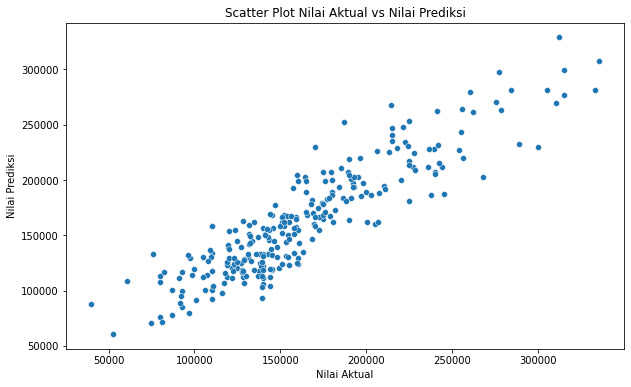

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot nilai aktual vs nilai prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test1, y=y_pred1)
plt.title('Scatter Plot Nilai Aktual vs Nilai Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()


## Uji Asumsi 

##### Linearity

Asumsi 1: Hubungan Linear antara Target dan Fitur 

Mengecek dengan scatter plot antara nilai aktual dan prediksi. Prediksi seharusnya mengikuti garis diagonal.


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


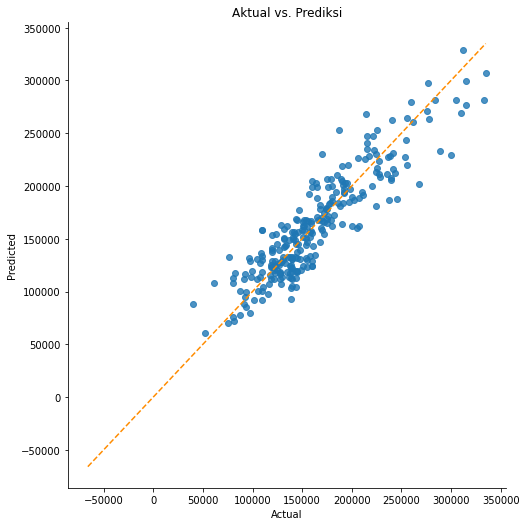

In [130]:
linear_assumption(lmodel, X_test_filtered1, y_test1)

##### Normalitas Ketentuan Kesalahan

Asumsi 2: Error Terms memiliki distribusi normal 

Menggunakan uji Anderson-Darling untuk distribusi normal
Nilai p dari uji - di bawah 0.05 umumnya berarti tidak normal: 0.7051876832191533
Residuals memiliki distribusi normal


C:\Users\Thesion\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


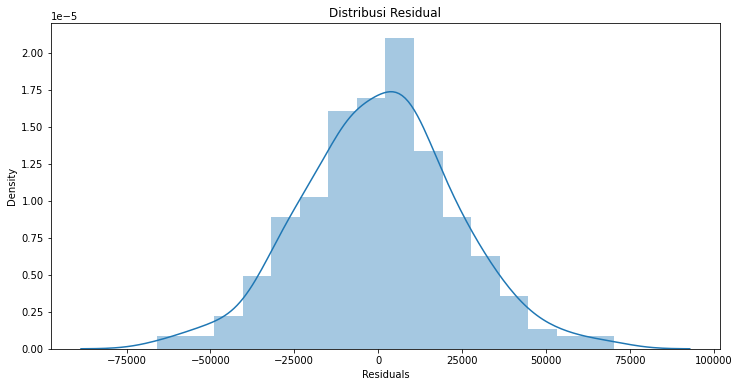


Asumsi terpenuhi


In [131]:
normal_errors_assumption(lmodel, X_test_filtered1, y_test1)

##### Tidak Ada Multikolinearitas Antar Prediktor (No Multicollinearity among Predictors)

In [132]:
# Fungsi untuk menguji asumsi multicollinearity dan menyimpan nama kolom dengan VIF > 10
def multicollinearity_assumption(model, features, label, feature_names=None):
    print('Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor', '\n')
        
    # Plot heatmap korelasi antar variabel
    plt.figure(figsize=(10, 8))
    sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
    plt.title('Korelasi Variabel')
    plt.show()
        
    print('Variance Inflation Factors (VIF)')
    print('> 10: Indikasi bahwa multicollinearity mungkin ada')
    print('> 100: Multicollinearity pasti ada di antara variabel')
    print('-------------------------------------')

    # Memilih kolom-kolom numerik
    numeric_features = features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = []  # Menyimpan nama kolom dengan VIF > 10
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(feature_names[idx], vif))
        if vif > 10:
            high_vif_columns.append(feature_names[idx])
        
    # Menghitung dan mencetak total kasus mungkin atau pasti multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} kasus mungkin multicollinearity'.format(possible_multicollinearity))
    print('{0} kasus pasti multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Asumsi terpenuhi')
        else:
            print('Asumsi mungkin terpenuhi')
            print()
            print('Interpretasi koefisien mungkin bermasalah')
            print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
    else:
        print('Asumsi tidak terpenuhi')
        print()
        print('Interpretasi koefisien akan bermasalah')
        print('Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi')
        print('Variabel dengan VIF > 10:', high_vif_columns)
    
    return high_vif_columns  # Menambahkan return statement


# Fungsi untuk mendapatkan kolom-kolom dengan VIF > 10
def high_vif_columns(features, feature_names, threshold=10):
    # Memilih kolom-kolom numerik
    numeric_features = features.select_dtypes(include=[np.number])
       
    # Menghitung VIF untuk setiap variabel
    VIF = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]
    high_vif_columns = [feature_names[idx] for idx, vif in enumerate(VIF) if vif > threshold]
    
    return high_vif_columns


Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor 



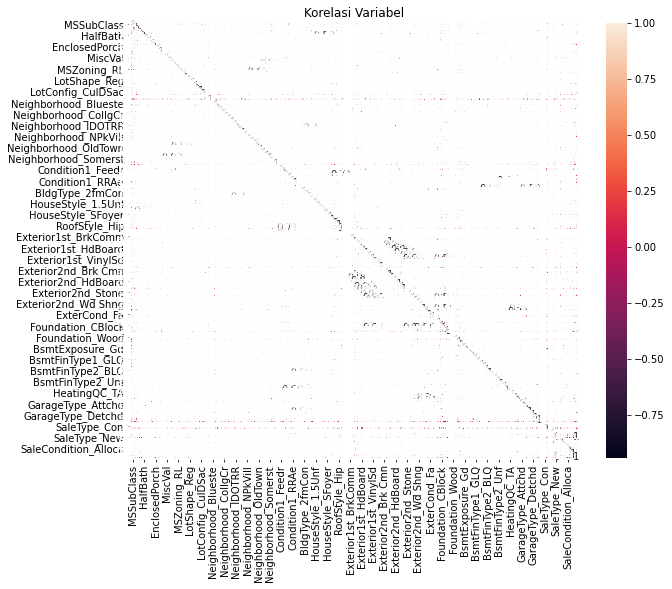

Variance Inflation Factors (VIF)
> 10: Indikasi bahwa multicollinearity mungkin ada
> 100: Multicollinearity pasti ada di antara variabel
-------------------------------------


C:\Users\Thesion\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Thesion\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


MSSubClass: 34.153844601733184
LotArea: 10.150022994857562
MasVnrArea: 2.779556057263808
BsmtFullBath: 3.1689233640457717
HalfBath: 3.5380495274550143
Fireplaces: 3.3761498319846925
WoodDeckSF: 2.5297195809563147
OpenPorchSF: 2.463381388664269
EnclosedPorch: 2.8278327513476897
3SsnPorch: 2.3274156156551116
ScreenPorch: 2.5213924359948243
PoolArea: nan
MiscVal: 2.005873480932016
MoSold: 2.031510204398085
MSZoning_FV: 52.24075586297118
MSZoning_RH: 18.802953182365748
MSZoning_RL: 205.13640397608373
MSZoning_RM: 163.05726373252338
LotShape_IR2: 2.522961296889581
LotShape_IR3: 1.8194281322578882
LotShape_Reg: 3.1369792609967453
LandContour_HLS: 2.6468591820828826
LandContour_Low: 5.627747549625091
LandContour_Lvl: 5.059003585232731
LotConfig_CulDSac: 2.807921604436775
LotConfig_FR2: 2.7772728766238517
LotConfig_FR3: nan
LotConfig_Inside: 2.3649216247601683
Neighborhood_Blueste: nan
Neighborhood_BrDale: 5.717528585703663
Neighborhood_BrkSide: 10.094067200293614
Neighborhood_ClearCr: 7.45084

['MSSubClass',
 'LotArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation

In [133]:
multicollinearity_assumption(lmodel, X_test_filtered1, y_test1, feature_names=X_train_filtered1.columns)

In [134]:
high_vif_columns2 = high_vif_columns(X_test_filtered1, feature_names=X_train_filtered1.columns)
high_vif_columns2

['MSSubClass',
 'LotArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation

##### Tidak Ada Autokorelasi Ketentuan Kesalahan ( No Autocorrelation of the Error Terms)

In [135]:
autocorrelation_assumption(lmodel, X_test_filtered1, y_test1)

Asumsi 4: Tidak ada Autocorrelation 


Melakukan Uji Durbin-Watson
Nilai 1.5 < d < 2.5 umumnya menunjukkan tidak ada autocorrelation pada data
0 hingga 2 adalah positif autocorrelation
>2 hingga 4 adalah negatif autocorrelation
-------------------------------------
Durbin-Watson: 1.809689355270025
Tidak ada autocorrelation atau sangat sedikit 

Asumsi terpenuhi


## Perbaiki data untuk uji asumsi yang tidak terpenuhi (2)

### Tidak Memenuhi Asumsi 3: Tidak ada multicollinearity yang signifikan di antara prediktor

Pertimbangkan untuk menghapus variabel dengan Variance Inflation Factor (VIF) tinggi

In [136]:
high_vif_columns2

['MSSubClass',
 'LotArea',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Neighborhood_BrkSide',
 'Neighborhood_CollgCr',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_NAmes',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1Story',
 'RoofStyle_Gable',
 'RoofStyle_Hip',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_TA',
 'Foundation

In [137]:
X_train_filtered2 = X_train_filtered1.drop(columns=high_vif_columns2)
X_test_filtered2 = X_test_filtered1.drop(columns=high_vif_columns2)

In [138]:
X_train_filtered2.head()

,MasVnrArea,BsmtFullBath,HalfBath,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
1172,0.000000,0.000000,0.693147,0.000000,0.000000,4.007333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359
49,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359
160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359
319,5.420535,0.693147,0.000000,1.098612,5.455321,3.891820,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359
1343,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.693359


### Build model setelah diperbaiki

In [139]:
# Pastikan jumlah baris X_train_filtered dan y_train sama
X_train_filtered2, y_train2 = X_train_filtered2.align(y_train, axis=0, join='inner')

# Pastikan jumlah baris X_test_filtered dan y_test sama
X_test_filtered2, y_test2 = X_test_filtered2.align(y_test, axis=0, join='inner')

In [140]:
# Build model dan fit data pada dataset yang telah diubah
lmodel = LinearRegression()
lmodel.fit(X_train_filtered2, y_train2)

# Model prediction pada dataset uji yang telah diubah
y_pred2 = lmodel.predict(X_test_filtered2)

# Evaluasi model
mae2 = mean_absolute_error(y_test2, y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_2 = r2_score(y_test2, y_pred2)

# Menampilkan hasil evaluasi
print('Mean Absolute Error (MAE):', mae2)
print('Root Mean Squared Error (RMSE):', rmse2)
print('R^2 Score:', r2_2)

Mean Absolute Error (MAE): 23269.28885207401
Root Mean Squared Error (RMSE): 29486.79913798065
R^2 Score: 0.6979429497743243


In [141]:
# Ambil nama kolom dari X_train setelah transformasi
transformed_feature_names2 = X_train_filtered2.columns

# Sesuaikan nama kolom pada X_test dengan nama kolom yang sesuai
df_test_filtered2 = df_test[transformed_feature_names2]

In [142]:
# Predict pada dataframe uji
subm_preds2 = lmodel.predict(df_test_filtered2)

# Membuat dataframe hasil prediksi
hasil2 = pd.DataFrame({
    "Id": id_test_list,
    "SalePrice": subm_preds2
})

# Menampilkan beberapa baris hasil
hasil2.head()

,Id,SalePrice
0,1461,3.704283e+05
1,1462,-9.472392e+06
2,1463,5.188384e+05
3,1464,7.486802e+05
4,1465,5.786932e+05


## Hasil Visual Grafik dan perbandingan error

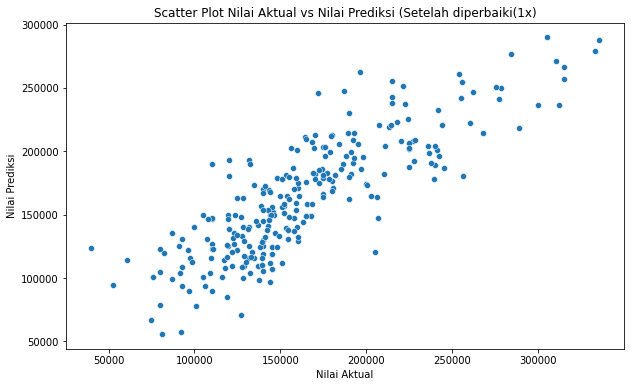

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot nilai aktual vs nilai prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test2, y=y_pred2)
plt.title('Scatter Plot Nilai Aktual vs Nilai Prediksi (Setelah diperbaiki(1x)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()


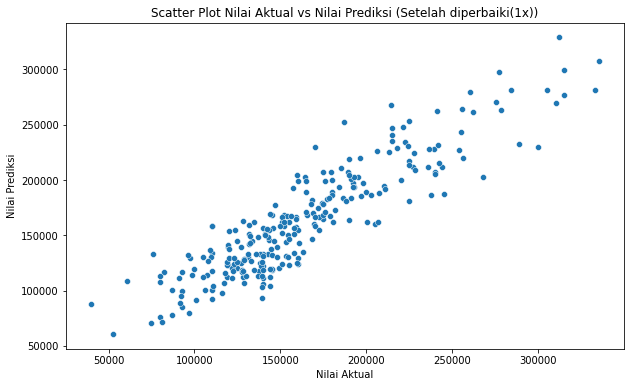

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot nilai aktual vs nilai prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test1, y=y_pred1)
plt.title('Scatter Plot Nilai Aktual vs Nilai Prediksi (Setelah diperbaiki(1x))')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()


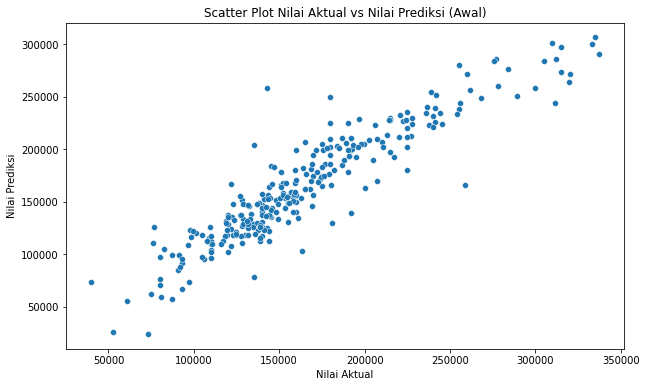

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot nilai aktual vs nilai prediksi
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Scatter Plot Nilai Aktual vs Nilai Prediksi (Awal)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.show()


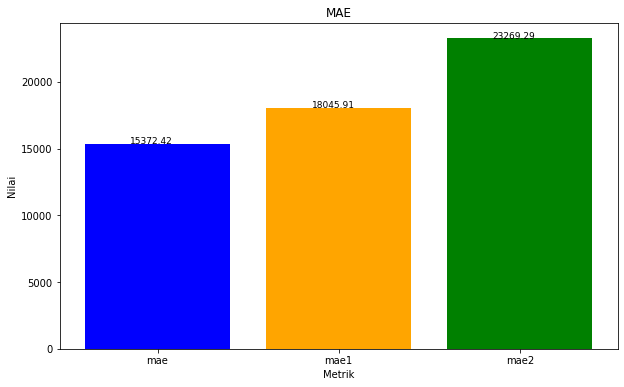

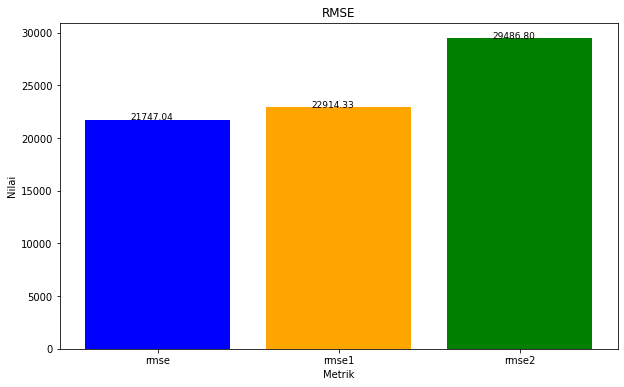

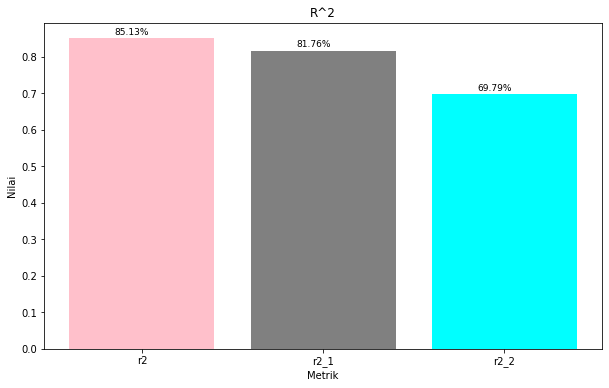

In [146]:
import matplotlib.pyplot as plt

# Data
labels = ['mae', 'mae1', 'mae2', 'rmse', 'rmse1', 'rmse2', 'r2', 'r2_1', 'r2_2']
values = [mae, mae1, mae2, rmse, rmse1, rmse2, r2, r2_1, r2_2]

# Pisahkan data untuk setiap metrik
mae_values = values[:3]
rmse_values = values[3:6]
r2_values = values[6:]

# Buat barchart untuk mae
plt.figure(figsize=(10, 6))
bars = plt.bar(labels[:3], mae_values, color=['blue', 'orange', 'green'])

# Tampilkan nilai di atas batang bar
for bar, value in zip(bars, mae_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2f}', fontsize=9)

plt.title('MAE')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Buat barchart untuk rmse
plt.figure(figsize=(10, 6))
bars = plt.bar(labels[3:6], rmse_values, color=['blue', 'orange', 'green'])

# Tampilkan nilai di atas batang bar
for bar, value in zip(bars, rmse_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2f}', fontsize=9)

plt.title('RMSE')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Buat barchart untuk r2
plt.figure(figsize=(10, 6))
bars = plt.bar(labels[6:], r2_values, color=['pink', 'gray', 'cyan'])

# Tampilkan nilai di atas batang bar
for bar, value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.2%}', fontsize=9)

plt.title('R^2')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()


# Kesimpulan

Hasil analisis menunjukkan bahwa model regresi sebelum perbaikan lebih baik daripada setelah perbaikan terhadap asumsi yang tidak terpenuhi. Hal ini tercermin pada grafik batang yang menunjukkan performa model. Sebelum perbaikan, model memiliki nilai MAE dan RMSE yang lebih kecil serta R2 yang lebih besar, menandakan presisi dan kecocokan model yang lebih baik dengan data. Namun, setelah dilakukan perbaikan terhadap asumsi yang tidak terpenuhi, terlihat peningkatan nilai eror dan penurunan R2. Hal ini mengindikasikan bahwa upaya perbaikan asumsi tersebut tidak memberikan dampak positif pada performa model, bahkan dapat menyebabkan penurunan kualitas prediksi. Oleh karena itu, penting untuk secara kritis mengevaluasi setiap perbaikan yang diimplementasikan dan memastikan bahwa mereka benar-benar meningkatkan kualitas model.